# Sprint 8: Machine Learning - Modelos no supervisados

# 1. Descripción

Práctica de Modelos no supervisados con ScikitLearn a partir de un dataset con información de registros de publicaciones en Facebook sobre Tailandia. Se quiere identificar ciertos grupos de usuarios de Facebook en función de su comportamiento.¶

<div class="alert alert-info alert-info"><b><h1>Objetivo</h1></b>
    
**Crear modelos no supervisados e interpretar correctamente el K – means, Clustering jerárquico y PCA (Principal Componentes Analytics).**
</div>

<div class="alert alert-success alert-success"><b><h1>Actividades a realizar:</h1></b>

 **Ejercicio 1**: Descargar el dataset adjunto, de registros de publicaciones en Facebook sobre Tailandia, y clasifica los diferentes registros utilizando el algoritmo de K-means.

 **Ejercicio 2** : Clasifica los distintos registros utilizando el algoritmo de clustering jerárquico.
    
 **Ejercicio 3** : Calcula el rendimiento del clustering mediante un parámetro como puede ser silueta..
 
</div>

<div class="alert alert-block alert-warning">
<b><h1>Descripción de las Variables</h1></b> 
</div>

Páginas de Facebook de 10 vendedores minoristas de moda y cosméticos tailandeses, con publicaciones de diferente naturaleza (video, fotos, estados y enlaces). Las métricas de compromiso consisten en comentarios, acciones y reacciones; el dataset contienen 10 atributos. El detalle de los atributos es el siguiente:

|     Variables    	|                    Descripción                    	|
|:----------------:	|:-------------------------------------------------:	|
|     status_id    	|                Id del apublicación                	|
|    status_type   	| Elemento publicado: Foto, video, estado o enlance 	|
| status_published 	|               Fecha de publicación                	|
|   num_reactions  	|        Reacciones que obtuvo la publicación       	|
|   num_comments   	|              Cantidad de comentarios              	|
|    num_shares    	|               Cantidad de compartir               	|
|     num_likes    	|               Cantidad de me gustan               	|
|     num_loves    	|             Cantidad del emoji encanta            	|
|     num_wows     	|              Cantidad del emoji guau              	|
|     num_hahas    	|              Cantidad del emoji hahas             	|
|     num_sads     	|             Cantidad del emoji triste             	|
|    num_angrys    	|            Cantidad del emoji molestos            	|
|   Column1/2/3/4  	|                  Columnas vacias                  	|

---

In [1]:
# import libreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import joypy
from joypy import joyplot
import missingno as msno

# Import the module for the split
from sklearn.model_selection import train_test_split

#import libreries to statitics
from scipy import stats
from scipy.stats import shapiro, ttest_ind, mannwhitneyu

#Import the module for the preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

#Import the module for the models no supervised
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from kneed import KneeLocator, DataGenerator as dg
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import scipy.cluster.hierarchy as shc
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-block alert-info">
<b><h1>Carga del Dataset</h1></b> 
</div>

In [2]:
fbthailandia_data= pd.read_csv('Publicacions Facebook Thailandia.csv')
fbthailandia_data

status_id status_type status_published  \
0      246675545449582_1649696485147474       video   4/22/2018 6:00   
1      246675545449582_1649426988507757       photo  4/21/2018 22:45   
2      246675545449582_1648730588577397       video   4/21/2018 6:17   
3      246675545449582_1648576705259452       photo   4/21/2018 2:29   
4      246675545449582_1645700502213739       photo   4/18/2018 3:22   
...                                 ...         ...              ...   
7045  1050855161656896_1061863470556065       photo   9/24/2016 2:58   
7046  1050855161656896_1061334757275603       photo  9/23/2016 11:19   
7047  1050855161656896_1060126464063099       photo  9/21/2016 23:03   
7048  1050855161656896_1058663487542730       photo   9/20/2016 0:43   
7049  1050855161656896_1050858841656528       photo  9/10/2016 10:30   

      num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0               529           512         262        432         92         3   
1               150             0           0        150          0         0   
2               227           236          57        204         21         1   
3               111             0           0        111          0         0   
4               213             0           0        204          9         0   
...             ...           ...         ...        ...        ...       ...   
7045             89             0           0         89          0         0   
7046             16             0           0         14          1         0   
7047              2             0           0          1          1         0   
7048            351            12          22        349          2         0   
7049             17             0           0         17          0         0   

      num_hahas  num_sads  num_angrys  Column1  Column2  Column3  Column4  
0             1         1           0      NaN      NaN      NaN      NaN  
1             0         0           0      NaN      NaN      NaN      NaN  
2             1         0           0      NaN      NaN      NaN      NaN  
3             0         0           0      NaN      NaN      NaN      NaN  
4             0         0           0      NaN      NaN      NaN      NaN  
...         ...       ...         ...      ...      ...      ...      ...  
7045          0         0           0      NaN      NaN      NaN      NaN  
7046          1         0           0      NaN      NaN      NaN      NaN  
7047          0         0           0      NaN      NaN      NaN      NaN  
7048          0         0           0      NaN      NaN      NaN      NaN  
7049          0         0           0      NaN      NaN      NaN      NaN  

[7050 rows x 16 columns]

In [3]:
fbthailandia_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

<h3>Observaciones:</h3>

   * El dataset posee 7050 filas y 16 columnas. 
   * La columna [1-4] está vacía, pero el resto de las funciones no tienen un valor vacío, por lo tanto se descartará.
   * Variable categórica: status_type
   * Variable numérica: num_reactions, num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas, num_sads y num_agrys.
   * Variable de fecha y hora: estado_publicado, por lo tanto, lo convertiremos al tipo de fecha y hora.
   * Se creara una variable "period of day" asignando el momento del dia en que se publica el elemento.
   * Se verificará si hay valores nulos o NaN, así como si existen valores duplicados.   

# 2. Preparación del Dataset

### 2.1 Eliminar las columnas vacías el Id.

In [4]:
fbthailandia_data.drop(columns = ['status_id', 'Column1', 'Column2', 'Column3', 'Column4' ], inplace = True)
fbthailandia_data

status_type status_published  num_reactions  num_comments  num_shares  \
0          video   4/22/2018 6:00            529           512         262   
1          photo  4/21/2018 22:45            150             0           0   
2          video   4/21/2018 6:17            227           236          57   
3          photo   4/21/2018 2:29            111             0           0   
4          photo   4/18/2018 3:22            213             0           0   
...          ...              ...            ...           ...         ...   
7045       photo   9/24/2016 2:58             89             0           0   
7046       photo  9/23/2016 11:19             16             0           0   
7047       photo  9/21/2016 23:03              2             0           0   
7048       photo   9/20/2016 0:43            351            12          22   
7049       photo  9/10/2016 10:30             17             0           0   

      num_likes  num_loves  num_wows  num_hahas  num_sads  num_angrys  
0           432         92         3          1         1           0  
1           150          0         0          0         0           0  
2           204         21         1          1         0           0  
3           111          0         0          0         0           0  
4           204          9         0          0         0           0  
...         ...        ...       ...        ...       ...         ...  
7045         89          0         0          0         0           0  
7046         14          1         0          1         0           0  
7047          1          1         0          0         0           0  
7048        349          2         0          0         0           0  
7049         17          0         0          0         0           0  

[7050 rows x 11 columns]

### 2.2 Convertir la variable "status_published"  al tipo de fecha y hora.

In [5]:
fbthailandia_data['status_published'] = pd.to_datetime(fbthailandia_data['status_published'])

In [6]:
# Verificamos el tipo de la columna después de la conversión
print(fbthailandia_data['status_published'].dtype)

datetime64[ns]


### 2.3 Separar la variable "status_published"  en "day" y "hour"

In [7]:
#Creation of day" and extract the value of the status_published column
fbthailandia_data['day'] = fbthailandia_data['status_published'].dt.date

#Creation "hour"and extract the value of the status_published column
fbthailandia_data['hour'] = fbthailandia_data['status_published'].dt.time

fbthailandia_data.head()

status_type    status_published  num_reactions  num_comments  num_shares  \
0       video 2018-04-22 06:00:00            529           512         262   
1       photo 2018-04-21 22:45:00            150             0           0   
2       video 2018-04-21 06:17:00            227           236          57   
3       photo 2018-04-21 02:29:00            111             0           0   
4       photo 2018-04-18 03:22:00            213             0           0   

   num_likes  num_loves  num_wows  num_hahas  num_sads  num_angrys  \
0        432         92         3          1         1           0   
1        150          0         0          0         0           0   
2        204         21         1          1         0           0   
3        111          0         0          0         0           0   
4        204          9         0          0         0           0   

          day      hour  
0  2018-04-22  06:00:00  
1  2018-04-21  22:45:00  
2  2018-04-21  06:17:00  
3  2018-04-21  02:29:00  
4  2018-04-18  03:22:00

#### Eliminar la columna "fbthailandia_data"

In [8]:
fbthailandia_data.drop(columns = ['status_published'], inplace = True)
fbthailandia_data.head()

status_type  num_reactions  num_comments  num_shares  num_likes  num_loves  \
0       video            529           512         262        432         92   
1       photo            150             0           0        150          0   
2       video            227           236          57        204         21   
3       photo            111             0           0        111          0   
4       photo            213             0           0        204          9   

   num_wows  num_hahas  num_sads  num_angrys         day      hour  
0         3          1         1           0  2018-04-22  06:00:00  
1         0          0         0           0  2018-04-21  22:45:00  
2         1          1         0           0  2018-04-21  06:17:00  
3         0          0         0           0  2018-04-21  02:29:00  
4         0          0         0           0  2018-04-18  03:22:00

#### Ordenar las columnas

In [9]:
fbthailandia_data = fbthailandia_data[['day', 'hour', 'num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 
                                    'num_sads', 'num_angrys', 'status_type']]
fbthailandia_data.head()

day      hour  num_reactions  num_comments  num_shares  num_likes  \
0  2018-04-22  06:00:00            529           512         262        432   
1  2018-04-21  22:45:00            150             0           0        150   
2  2018-04-21  06:17:00            227           236          57        204   
3  2018-04-21  02:29:00            111             0           0        111   
4  2018-04-18  03:22:00            213             0           0        204   

   num_loves  num_wows  num_hahas  num_sads  num_angrys status_type  
0         92         3          1         1           0       video  
1          0         0          0         0           0       photo  
2         21         1          1         0           0       video  
3          0         0          0         0           0       photo  
4          9         0          0         0           0       photo

### 2.4 Crear una variable "period of day".

In [10]:
def determine_period_day(hour):
    if hour.hour >= 0 and hour.hour < 6:
        return "early morning"
    elif hour.hour >= 6 and hour.hour < 12:
        return "morning"
    elif hour.hour >= 12 and hour.hour < 14:
        return "noon"
    elif hour.hour >= 14 and hour.hour < 21:
        return "evening"
    else:
        return "night"

In [11]:
fbthailandia_data["period_day"] = fbthailandia_data["hour"].apply(determine_period_day)
fbthailandia_data.head()

day      hour  num_reactions  num_comments  num_shares  num_likes  \
0  2018-04-22  06:00:00            529           512         262        432   
1  2018-04-21  22:45:00            150             0           0        150   
2  2018-04-21  06:17:00            227           236          57        204   
3  2018-04-21  02:29:00            111             0           0        111   
4  2018-04-18  03:22:00            213             0           0        204   

   num_loves  num_wows  num_hahas  num_sads  num_angrys status_type  \
0         92         3          1         1           0       video   
1          0         0          0         0           0       photo   
2         21         1          1         0           0       video   
3          0         0          0         0           0       photo   
4          9         0          0         0           0       photo   

      period_day  
0        morning  
1          night  
2        morning  
3  early morning  
4  early morning

#### Ordenar las columnas

In [12]:
fbthailandia_data = fbthailandia_data[['day', 'hour', 'period_day','num_reactions', 'num_comments', 'num_shares', 'num_likes',
                                       'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'status_type']]
fbthailandia_data.head()

day      hour     period_day  num_reactions  num_comments  \
0  2018-04-22  06:00:00        morning            529           512   
1  2018-04-21  22:45:00          night            150             0   
2  2018-04-21  06:17:00        morning            227           236   
3  2018-04-21  02:29:00  early morning            111             0   
4  2018-04-18  03:22:00  early morning            213             0   

   num_shares  num_likes  num_loves  num_wows  num_hahas  num_sads  \
0         262        432         92         3          1         1   
1           0        150          0         0          0         0   
2          57        204         21         1          1         0   
3           0        111          0         0          0         0   
4           0        204          9         0          0         0   

   num_angrys status_type  
0           0       video  
1           0       photo  
2           0       video  
3           0       photo  
4           0       photo

In [13]:
fbthailandia_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   day            7050 non-null   object
 1   hour           7050 non-null   object
 2   period_day     7050 non-null   object
 3   num_reactions  7050 non-null   int64 
 4   num_comments   7050 non-null   int64 
 5   num_shares     7050 non-null   int64 
 6   num_likes      7050 non-null   int64 
 7   num_loves      7050 non-null   int64 
 8   num_wows       7050 non-null   int64 
 9   num_hahas      7050 non-null   int64 
 10  num_sads       7050 non-null   int64 
 11  num_angrys     7050 non-null   int64 
 12  status_type    7050 non-null   object
dtypes: int64(9), object(4)
memory usage: 716.1+ KB


### 2.5 Verificar nulos y NaM

In [14]:
fbthailandia_data.isnull().sum()

day              0
hour             0
period_day       0
num_reactions    0
num_comments     0
num_shares       0
num_likes        0
num_loves        0
num_wows         0
num_hahas        0
num_sads         0
num_angrys       0
status_type      0
dtype: int64

In [15]:
fbthailandia_data.isna().sum()

day              0
hour             0
period_day       0
num_reactions    0
num_comments     0
num_shares       0
num_likes        0
num_loves        0
num_wows         0
num_hahas        0
num_sads         0
num_angrys       0
status_type      0
dtype: int64

* Como se pueden observar no hay valores faltantes ni NAN en el dataset. Se realiza una gráfica msno, la cual es una manera visual de verificar la distribucción de los valores faltantes en un dataset. 

<AxesSubplot:>

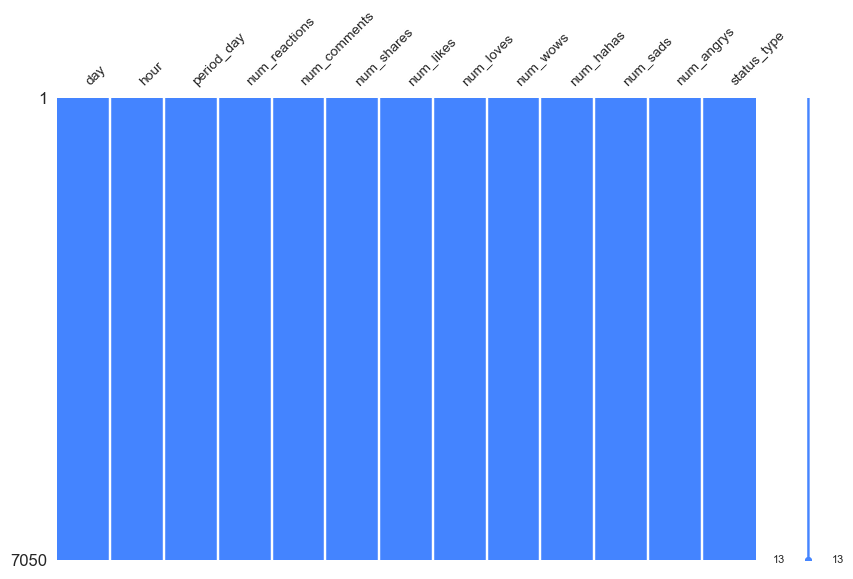

In [16]:
# show missing values and how they are distributed in the dataset. 
msno.matrix(fbthailandia_data, color=(0.27, 0.52, 1.0), figsize=(10,6),fontsize=(10))

### 2.6 Verificar datos duplicados

In [17]:
fbthailandia_data[fbthailandia_data.duplicated()]

day      hour     period_day  num_reactions  num_comments  \
3739  2017-07-17  07:11:00        morning              0             0   
3763  2017-07-10  08:41:00        morning              0             0   
4048  2018-05-27  01:16:00  early morning              0             0   
6221  2018-06-10  03:43:00  early morning            376            20   
6222  2018-06-09  22:53:00          night            255             7   
6223  2018-06-07  07:01:00        morning           1704            21   
6224  2018-06-06  02:20:00  early morning            205            39   
6225  2018-06-04  06:57:00        morning            336            42   
6226  2018-06-01  00:35:00  early morning            111             2   
6227  2018-05-30  06:33:00        morning            357            18   
6228  2018-05-30  02:39:00  early morning            114             7   
6229  2018-05-29  04:39:00  early morning            133             7   
6230  2018-05-27  01:31:00  early morning            532            32   
6231  2018-05-26  08:08:00        morning            231            16   
6232  2018-05-25  07:56:00        morning            684            38   
6233  2018-05-23  01:10:00  early morning           1627            30   
6234  2018-05-20  06:18:00        morning            791            34   
6235  2018-05-17  20:00:00        evening           1404            39   
6236  2018-05-12  01:57:00  early morning            824           106   
6237  2018-05-11  03:23:00  early morning            295            18   
6238  2018-05-09  08:45:00        morning           1957           124   
6239  2018-05-05  11:20:00        morning           1730           161   
6240  2018-05-03  23:57:00          night           1655            47   
6241  2018-04-30  06:20:00        morning            237            67   
6242  2018-04-27  23:27:00          night            360            22   
6243  2018-04-26  19:00:00        evening           2635           308   
6244  2018-04-23  07:26:00        morning            324            45   
6245  2018-04-20  03:16:00  early morning           1271            94   
6246  2018-04-19  07:05:00        morning            851           100   
6247  2018-04-12  03:42:00  early morning           1992            36   
6248  2018-04-11  03:43:00  early morning           4315            24   
6249  2018-04-09  10:49:00        morning           4114           104   
6250  2018-04-08  22:50:00          night             95             3   
6251  2018-04-08  01:08:00  early morning            111             9   
6252  2018-04-07  03:23:00  early morning            796           143   
6253  2018-04-06  16:34:00        evening            508            12   
6254  2018-04-05  10:47:00        morning           2506           287   
6255  2018-04-04  02:20:00  early morning            251            29   
6256  2018-04-02  10:16:00        morning           1244           218   
6257  2018-04-02  07:33:00        morning             75             2   
6258  2018-04-01  05:47:00  early morning            867            90   
6259  2018-04-01  04:32:00  early morning             87             5   
6260  2018-03-29  13:54:00           noon            614            78   
6261  2018-03-29  08:23:00        morning           2420            75   
6262  2018-03-26  01:57:00  early morning             86             5   
6263  2018-03-25  04:43:00  early morning            488            20   
6264  2018-03-24  23:51:00          night            157            16   
6265  2018-03-23  15:53:00        evening            547            71   
6266  2018-03-22  06:10:00        morning           1168           104   
6267  2018-03-22  03:48:00  early morning            879           165   
6268  2018-03-21  01:15:00  early morning            114             6   
6269  2018-03-20  01:54:00  early morning            186            15   
6270  2018-03-18  04:28:00  early morning           1985            39   
6271  2018-03-16 

In [18]:
fbthailandia_data[fbthailandia_data.duplicated()].count()

day              54
hour             54
period_day       54
num_reactions    54
num_comments     54
num_shares       54
num_likes        54
num_loves        54
num_wows         54
num_hahas        54
num_sads         54
num_angrys       54
status_type      54
dtype: int64

Como se puede observar existen 54 registros duplicados, lo cual se procedrá a eliminar.

In [19]:
fbData_sin_duplicados = fbthailandia_data.drop_duplicates()
fbData_sin_duplicados

day      hour     period_day  num_reactions  num_comments  \
0     2018-04-22  06:00:00        morning            529           512   
1     2018-04-21  22:45:00          night            150             0   
2     2018-04-21  06:17:00        morning            227           236   
3     2018-04-21  02:29:00  early morning            111             0   
4     2018-04-18  03:22:00  early morning            213             0   
...          ...       ...            ...            ...           ...   
7045  2016-09-24  02:58:00  early morning             89             0   
7046  2016-09-23  11:19:00        morning             16             0   
7047  2016-09-21  23:03:00          night              2             0   
7048  2016-09-20  00:43:00  early morning            351            12   
7049  2016-09-10  10:30:00        morning             17             0   

      num_shares  num_likes  num_loves  num_wows  num_hahas  num_sads  \
0            262        432         92         3          1         1   
1              0        150          0         0          0         0   
2             57        204         21         1          1         0   
3              0        111          0         0          0         0   
4              0        204          9         0          0         0   
...          ...        ...        ...       ...        ...       ...   
7045           0         89          0         0          0         0   
7046           0         14          1         0          1         0   
7047           0          1          1         0          0         0   
7048          22        349          2         0          0         0   
7049           0         17          0         0          0         0   

      num_angrys status_type  
0              0       video  
1              0       photo  
2              0       video  
3              0       photo  
4              0       photo  
...          ...         ...  
7045           0       photo  
7046           0       photo  
7047           0       photo  
7048           0       photo  
7049           0       photo  

[6996 rows x 13 columns]

In [20]:
fbData_sin_duplicados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6996 entries, 0 to 7049
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   day            6996 non-null   object
 1   hour           6996 non-null   object
 2   period_day     6996 non-null   object
 3   num_reactions  6996 non-null   int64 
 4   num_comments   6996 non-null   int64 
 5   num_shares     6996 non-null   int64 
 6   num_likes      6996 non-null   int64 
 7   num_loves      6996 non-null   int64 
 8   num_wows       6996 non-null   int64 
 9   num_hahas      6996 non-null   int64 
 10  num_sads       6996 non-null   int64 
 11  num_angrys     6996 non-null   int64 
 12  status_type    6996 non-null   object
dtypes: int64(9), object(4)
memory usage: 765.2+ KB


<h3>Observaciones:</h3>

   *  Se puede observar que el data set no tiene valores nulos o NaN. 
   *  Se encontraron en el data set 51 valores duplicados que se procedieron a remover.  
   *  Variable categórica: status_type y period_day. 
   * Variable numérica: num_reactions, num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas, num_sads y num_agrys.
   * Se tienen  6999 muestras (filas), 14 funciones (columnas), incluyendola variable target u objetivo.
   * Para el estudio se toamaran en cuenta las siguientes variables: 
        * **Categoricas**: status_type y period_day
        * **Numericas**: um_reactions, num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas, num_sads y num_angrys.

# 3. Descripción estadística y visualización de las variables.

Se creará un nuevo data set con sólo 11 variables para el estudio.

In [21]:
fb_data = fbData_sin_duplicados[['status_type','period_day','num_reactions', 'num_comments', 'num_shares', 'num_likes', 
                                 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']]
fb_data

status_type     period_day  num_reactions  num_comments  num_shares  \
0          video        morning            529           512         262   
1          photo          night            150             0           0   
2          video        morning            227           236          57   
3          photo  early morning            111             0           0   
4          photo  early morning            213             0           0   
...          ...            ...            ...           ...         ...   
7045       photo  early morning             89             0           0   
7046       photo        morning             16             0           0   
7047       photo          night              2             0           0   
7048       photo  early morning            351            12          22   
7049       photo        morning             17             0           0   

      num_likes  num_loves  num_wows  num_hahas  num_sads  num_angrys  
0           432         92         3          1         1           0  
1           150          0         0          0         0           0  
2           204         21         1          1         0           0  
3           111          0         0          0         0           0  
4           204          9         0          0         0           0  
...         ...        ...       ...        ...       ...         ...  
7045         89          0         0          0         0           0  
7046         14          1         0          1         0           0  
7047          1          1         0          0         0           0  
7048        349          2         0          0         0           0  
7049         17          0         0          0         0           0  

[6996 rows x 11 columns]

In [22]:
def estadisticos_num(cont_data):
    #Calculamos describe
    estadisticos = cont_data.describe().round(3).T
    #Añadimos la mediana
    estadisticos['median'] = cont_data.median().round(3)
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [23]:
estadisticos_num(fb_data)

count     mean  median      std  min   25%   50%     75%  \
num_reactions  6996.0  225.091    58.0  452.954  0.0  17.0  58.0  216.00   
num_comments   6996.0  225.649     4.0  892.922  0.0   0.0   4.0   22.25   
num_shares     6996.0   40.276     0.0  132.073  0.0   0.0   0.0    4.00   
num_likes      6996.0  210.037    57.0  439.623  0.0  17.0  57.0  182.00   
num_loves      6996.0   12.757     0.0   40.115  0.0   0.0   0.0    3.00   
num_wows       6996.0    1.253     0.0    8.727  0.0   0.0   0.0    0.00   
num_hahas      6996.0    0.698     0.0    3.972  0.0   0.0   0.0    0.00   
num_sads       6996.0    0.233     0.0    1.481  0.0   0.0   0.0    0.00   
num_angrys     6996.0    0.110     0.0    0.689  0.0   0.0   0.0    0.00   

                   max  
num_reactions   4710.0  
num_comments   20990.0  
num_shares      3424.0  
num_likes       4710.0  
num_loves        657.0  
num_wows         278.0  
num_hahas        157.0  
num_sads          51.0  
num_angrys        31.0

**Observación:**

Estos estadísticos se presentan para 8 atributos relacionados con reacciones en una plataforma de ventas en línea. Entre los puntos más resaltantes se pueden mencionar:

* La variable "num_reactions" tiene un valor promedio de 224.995 con una desviación estándar de 452.881, lo que sugiere que la mayoría de los valores están concentrados cerca del valor promedio.

* La variable "num_comments" tiene un valor promedio de 225.552 con una desviación estándar de 892.741, lo que indica una mayor dispersión de los valores.

* La variable "num_shares" tiene un valor promedio de 40.259 con una desviación estándar de 132.047, lo que sugiere una amplia dispersión de valores.

* La variable "num_likes" tiene un valor promedio de 209.947 y una desviación estándar de 439.550, lo que indica una amplia dispersión de valores.

* La variable "num_loves" tiene un valor promedio de 12.752 con una desviación estándar de 40.107, lo que sugiere una amplia dispersión de valores.

* La variable "num_wows" tiene un valor promedio de 1.253 con una desviación estándar de 8.726, lo que sugiere una amplia dispersión de valores.

* La variable "num_hahas" tiene un valor promedio de 0.698 con una desviación estándar de 3.971, lo que sugiere una amplia dispersión de valores.

* La variable "num_sads" tiene un valor promedio de 0.233 con una desviación estándar de 1.481, lo que sugiere una amplia dispersión de valores.

* La variable "num_angrys" tiene un valor promedio de 0.110 con una desviación estándar de 0.689, lo que sugiere una amplia dispersión de valores.

## 3.1 Análisis Univariable

In [24]:
#variables continuas
cont_data = fb_data.copy()
cont_data = cont_data.drop(['status_type', 'period_day'], axis=1)
cont_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6996 entries, 0 to 7049
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   num_reactions  6996 non-null   int64
 1   num_comments   6996 non-null   int64
 2   num_shares     6996 non-null   int64
 3   num_likes      6996 non-null   int64
 4   num_loves      6996 non-null   int64
 5   num_wows       6996 non-null   int64
 6   num_hahas      6996 non-null   int64
 7   num_sads       6996 non-null   int64
 8   num_angrys     6996 non-null   int64
dtypes: int64(9)
memory usage: 546.6 KB


Text(0.5, 0.98, 'Visualizing continuous variables')

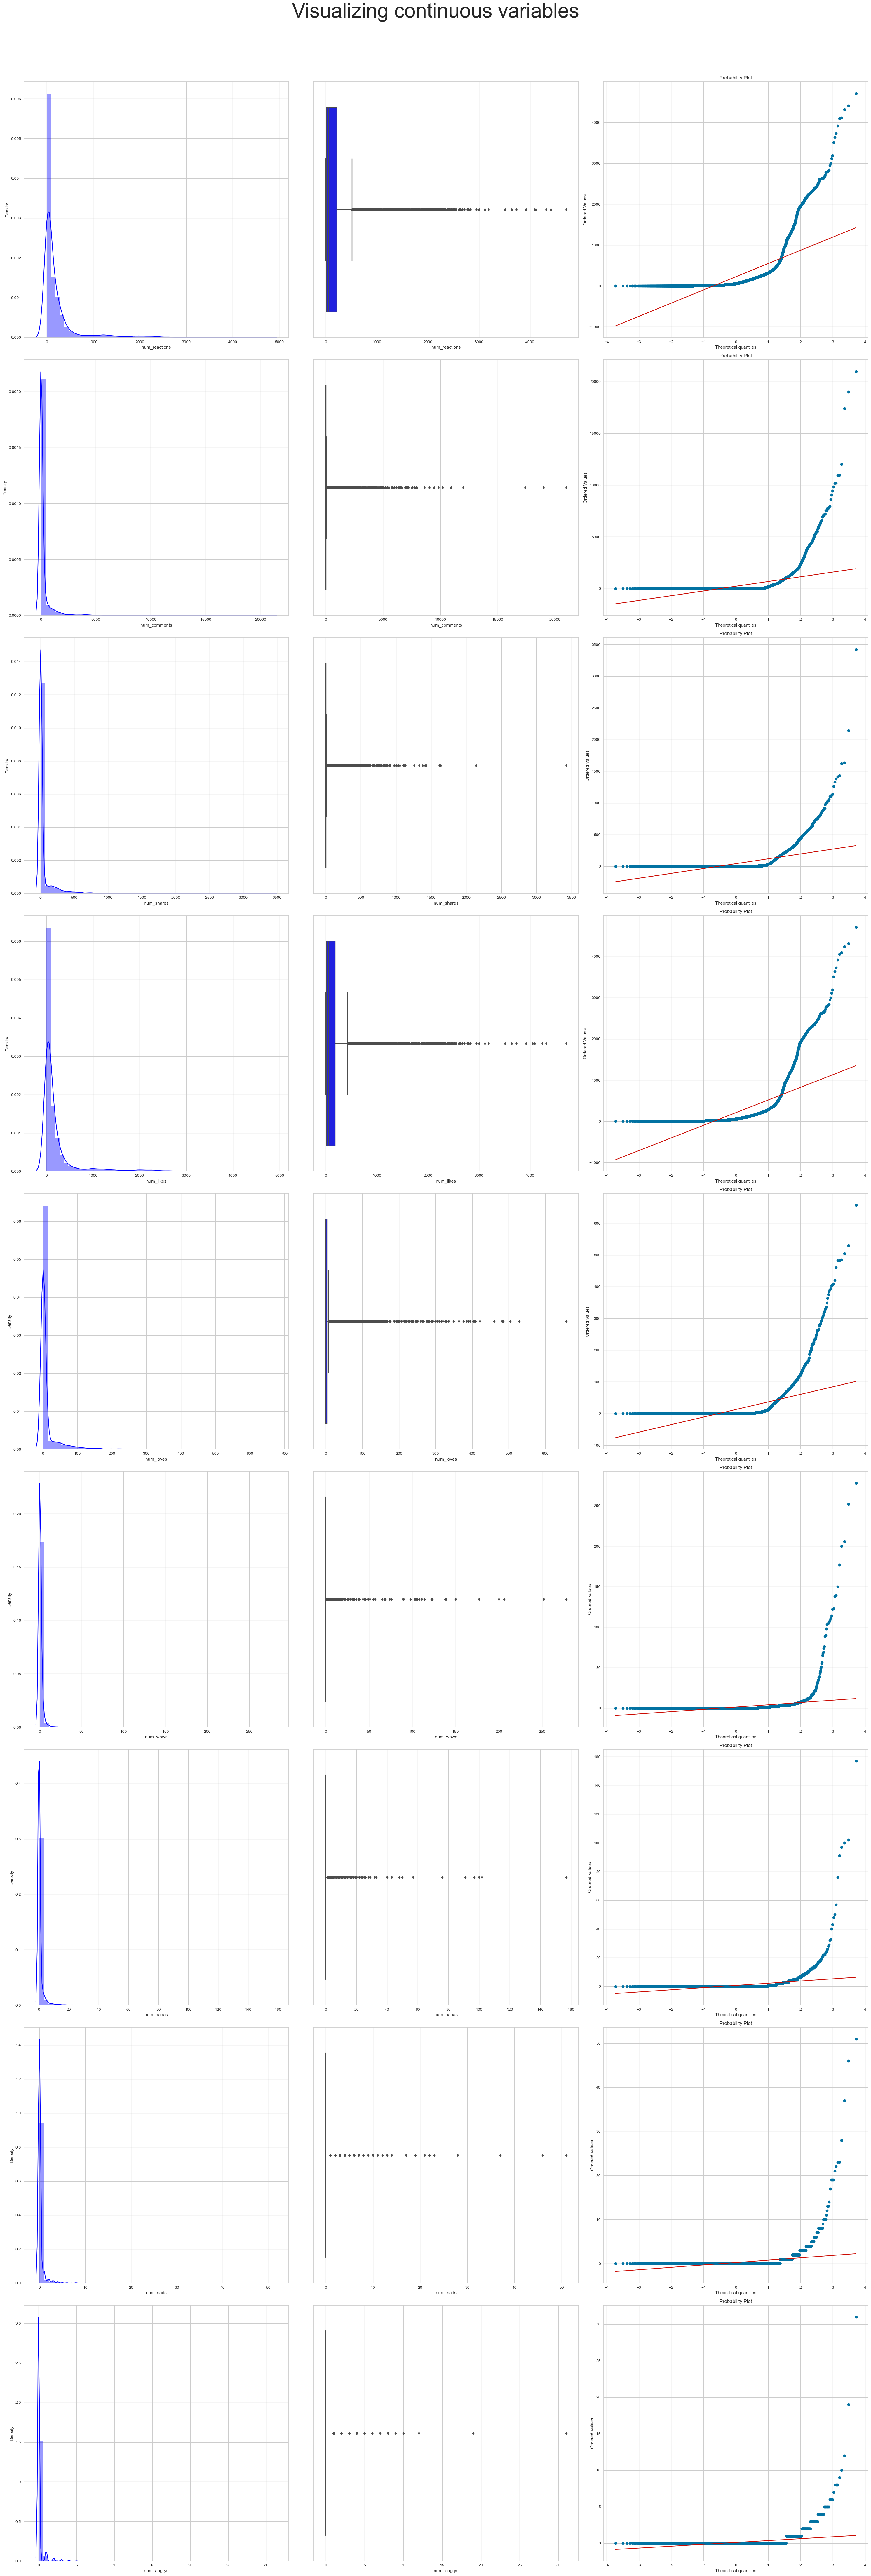

In [25]:
#Visualizing continuous variables
fig,ax = plt.subplots(9,3,figsize=(30,90))
for index,i in enumerate(cont_data.columns):
    sns.distplot(cont_data[i],ax=ax[index,0],color='blue')
    sns.boxplot(cont_data[i],ax=ax[index,1],color='blue')
    stats.probplot(cont_data[i],plot=ax[index,2])
    
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing continuous variables",fontsize=50)

Como se observan en las gráficas de densidad y de probabilidad algunas variables no distribuyen normalmente. En las gráficas de densidad se pueden observar variables con sesgo a la izquierda y a la derecha, indicando problablemente alguna diferencia entre la media y mediana, tal como lo muestra el análisis estadístico anteriormente descrito. 

Con respecto a los gráficos de probabilidades se observan variables en donde algunos registros no siguen la línea recta, con fuerte dispersión en los entremos y en algunos casos en el centro, infiriendo que no hay distribucción normal, este punto se verificará aplicando una prueba de hipótesis. 

En el grafico de cajas (BoxPlot) se observan que todas las variables presentan valores atipicos o outliers, se determinaran el % de outliers en los atributos. 

#### Aplicación de prueba de hipotesis para chequear distribución normal

Se verificaran si las variables tienen distribucción normal (forman una grafica gauss), a través de ula prueba de hipótesis de Shapiro. La hipótesis planteada es:

* H₀: Los datos están distribuidos normalmente.

* H₁: Los datos no están distribuidos normalmente.

In [26]:
def check_normal_distribution(data):
    for i in data.columns:
        shapiro_test = stats.shapiro(data[i])
        print('La variable', i, 'tiene un p-value= ', shapiro_test.pvalue)
        if shapiro_test.pvalue>0.05:
            print('Se acepta la hipotesis nula, la muestra tiene una distribución normal (Probablemente Gaussiana).\n')
            print('----------------------------------------------------------------------------------------------')
        else:
            print('Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).\n')
            print('----------------------------------------------------------------------------------------------')

In [27]:
check_normal_distribution(cont_data)

La variable num_reactions tiene un p-value=  0.0
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

----------------------------------------------------------------------------------------------
La variable num_comments tiene un p-value=  0.0
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

----------------------------------------------------------------------------------------------
La variable num_shares tiene un p-value=  0.0
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

----------------------------------------------------------------------------------------------
La variable num_likes tiene un p-value=  0.0
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

----------------------------------------------------------------------------------------------
La variable 

Se realizó una prueba de hipótesis para determinar la normalidad de distribución de ocho variables en una muestra: num_reactions, num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas, num_sads y num_angrys. Todas las variables tuvieron un p-value igual a 0, lo que indica que se rechaza la hipótesis nula de que la muestra tiene una distribución normal. Es probable que estas variables tengan una distribución no gaussiana.

#### Verificar Asimetrias

In [28]:
cont_data.agg(['skew','kurtosis']).T

skew    kurtosis
num_reactions   3.742841   16.629123
num_comments    8.994234  125.898666
num_shares      7.072010   96.147398
num_likes       3.932518   18.428222
num_loves       5.985033   50.209759
num_wows       18.341485  417.617093
num_hahas      20.236975  583.034529
num_sads       17.637044  448.576762
num_angrys     20.023385  699.575034

Esta tabla muestra los resultados de la asimetría y la curtosis de las variables. La asimetría mide la simetría de la distribución alrededor de su media y la curtosis mide la forma de la distribución. Una distribución normal tiene una asimetría de cero y una curtosis de tres.

Los valores en la tabla indican que la mayoría de las variables no tienen una distribución normal, ya que su asimetría y curtosis no se aproximan a cero y tres, respectivamente. Esto se correlaciona con los resultados de los tests de normalidad, donde las variables fueron rechazadas como normalmente distribuidas.

#### Verificar valores atipicos

In [29]:
#% of outliers
for k, v in cont_data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(cont_data)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))    

Column num_reactions outliers = 9.85%
Column num_comments outliers = 19.51%
Column num_shares outliers = 20.21%
Column num_likes outliers = 10.78%
Column num_loves outliers = 18.62%
Column num_wows outliers = 100.00%
Column num_hahas outliers = 100.00%
Column num_sads outliers = 100.00%
Column num_angrys outliers = 100.00%


Este informe muestra que una cantidad significativa de los valores de cada una de las variables num_reactions, num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas, num_sads y num_angrys están fuera de los límites esperados para una distribución normal. 

En particular, el informe indica que entre el 10% y el 20% de los valores son considerados "outliers" en las variables num_reactions, num_comments, num_shares y num_likes. Mientras que el 100% de los valores en las variables num_wows, num_hahas, num_sads y num_angrys son considerados outliers. 

Esto indica que los datos en estas columnas son muy dispares y se encuentran alejados de la mayoría de los datos, lo que puede afectar el análisis y la interpretación de los resultados.

<div class="alert alert-success">
  <strong>Observación:</strong> En general, se puede observar que las variables poseen la distribuciones son sesgadas a la derecha. Adicionalmente existen presencia outliers en todos los atributos, están fuera de los límites esperados para una distribución normal, por lo que es posible que se necesite aplicar algunos tipos de transformaciones, previo al modelaje. 
</div>

## 3.2 Análisis multi-variables

Se realiza un gráfico pairplot para verificar si existe algunas correlaciones entre las variables y los tipos de publicaciones(status_type).

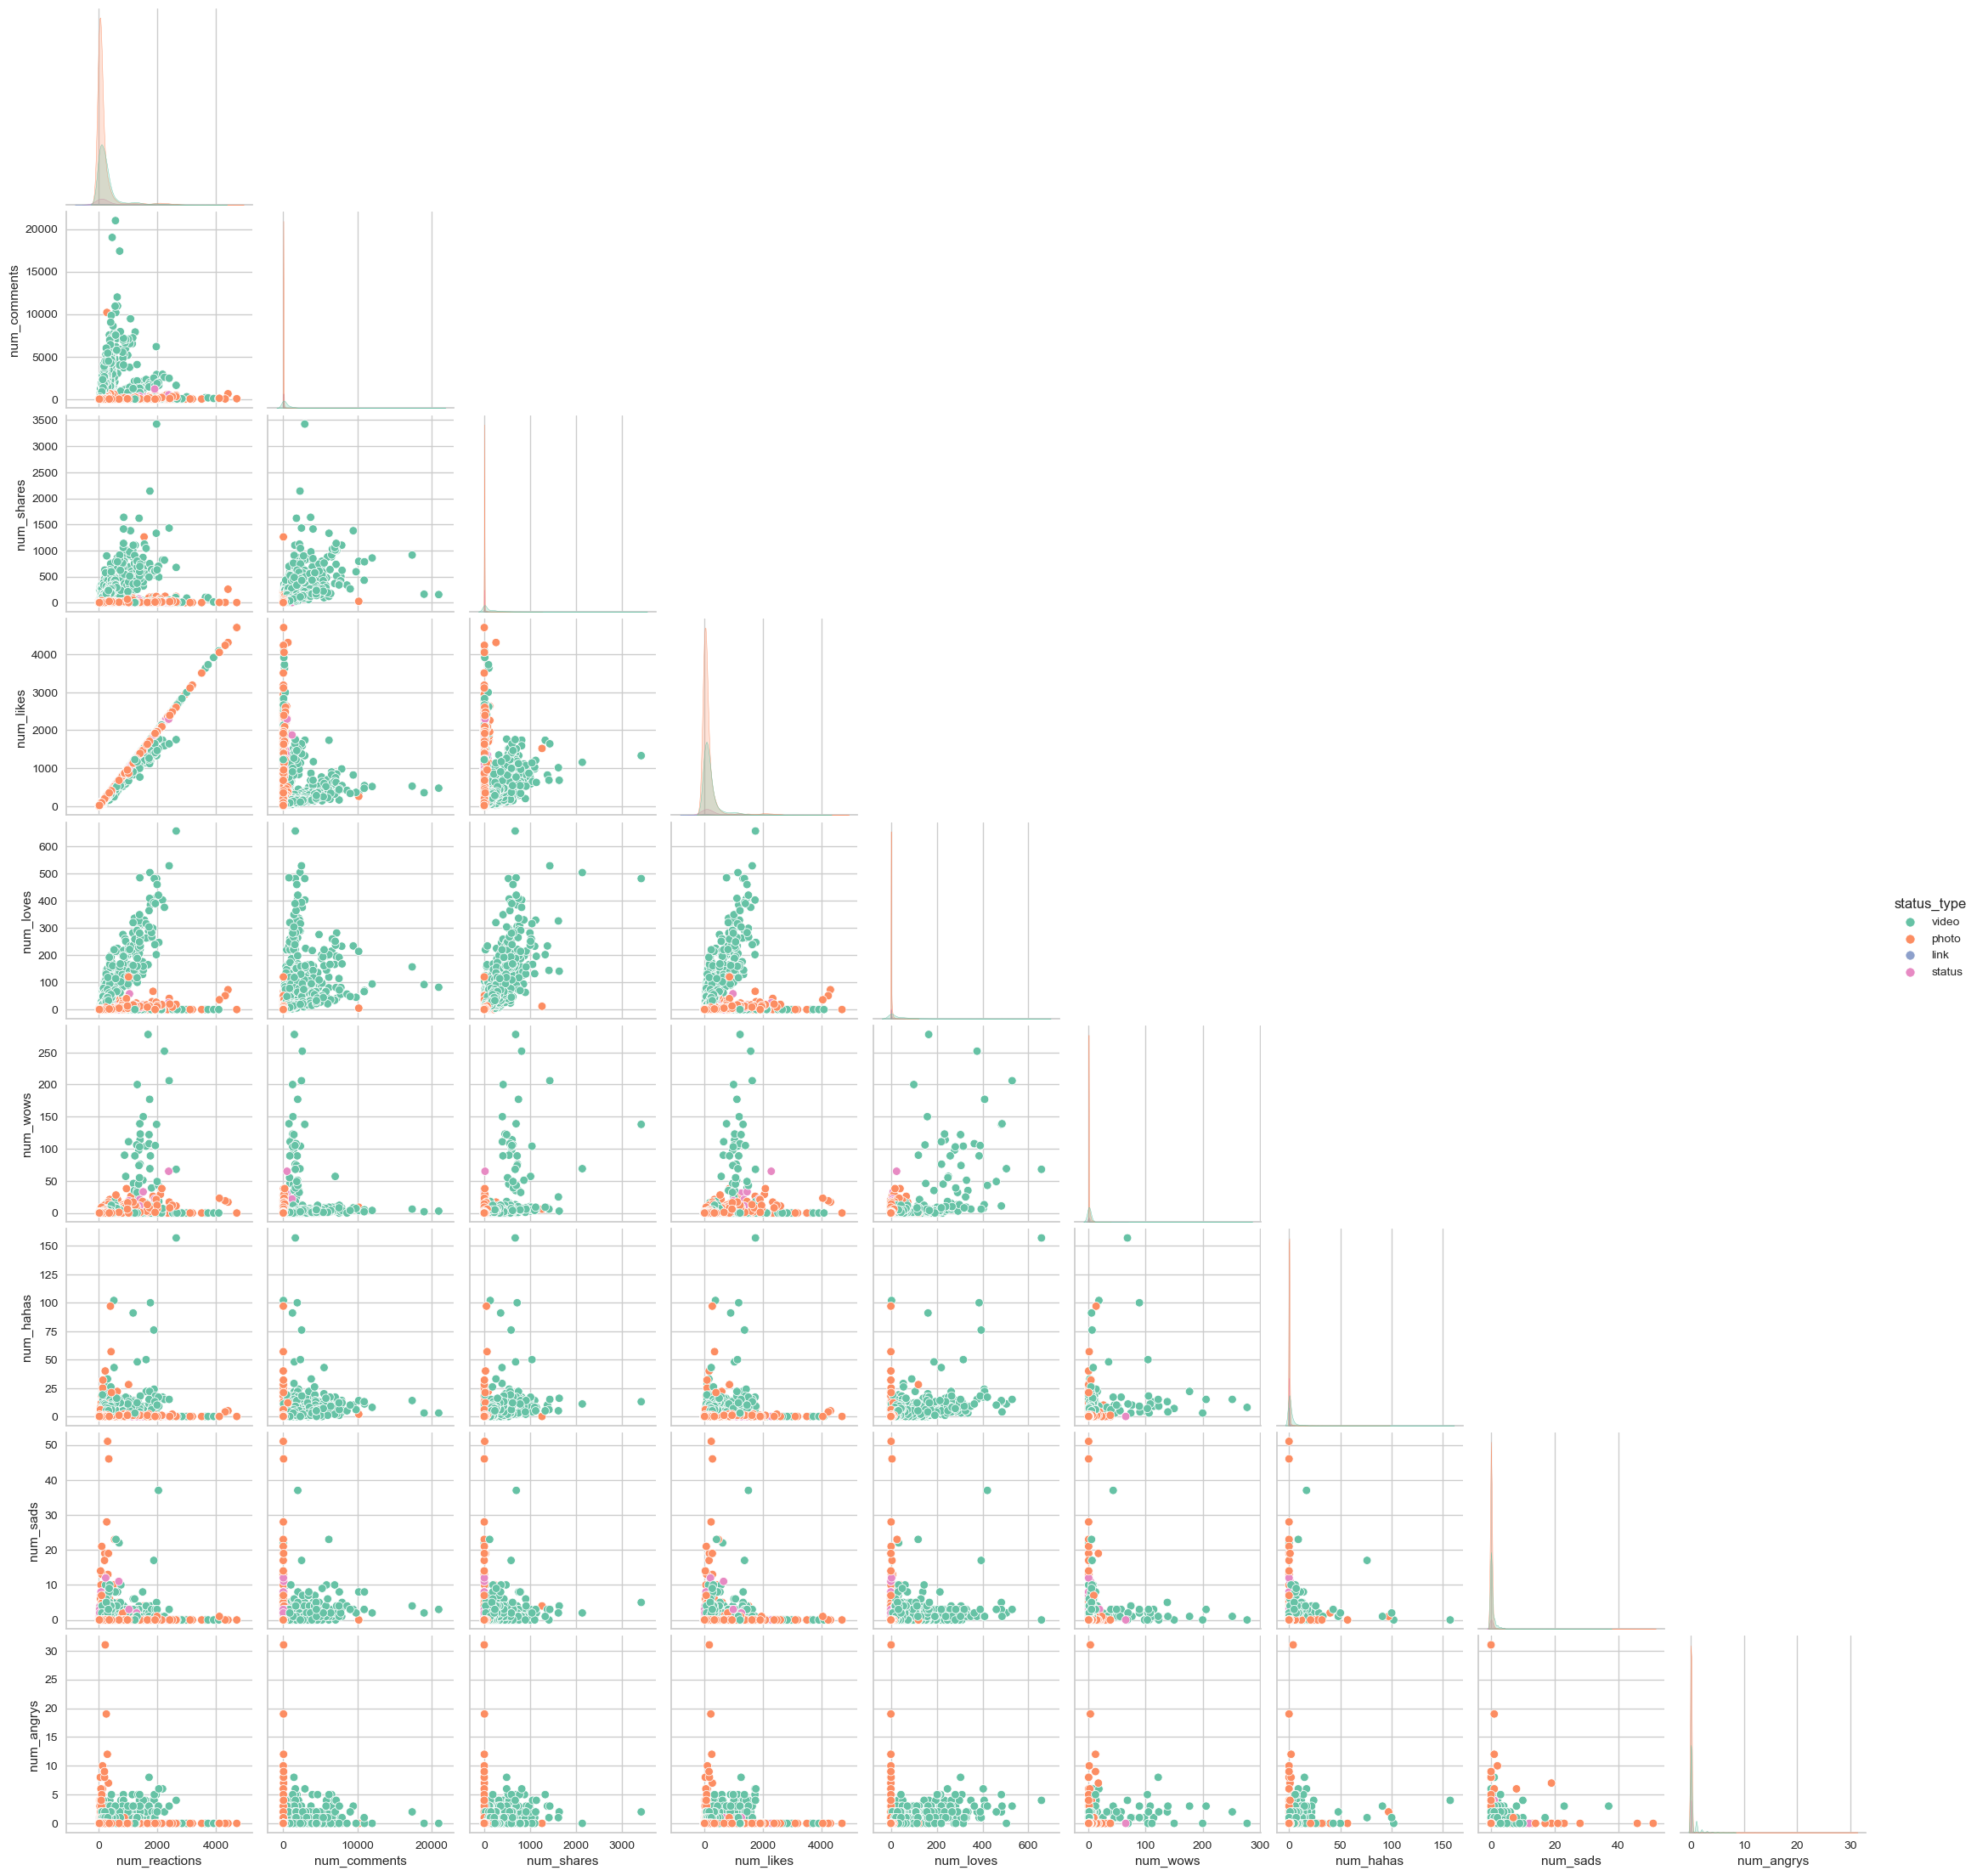

In [30]:
sns.pairplot(fb_data , hue='status_type', palette = 'Set2', corner= True );

Los gráficos de pairplot se pueden ver correlación entre algunas de las variables entre ellas y con correlaciones positiva y negativa respetivamente con respecto el atributo de los tipos de publicaciones(status_type). 

En la diagonal se puede ver la distribución de cada variable con respecto al tipo de publicación, lo que se puede observar que algunas características, tienen las distribuciones de clases con medias bastante diferentes. Este tipo de información se puede corroborar graficando de densidad de Kernel y verificar si el tipo de clase afecta en la distribucción.

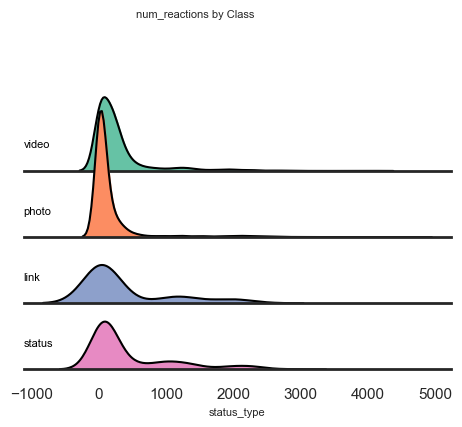

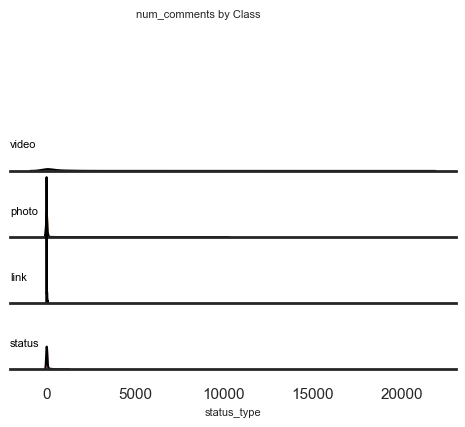

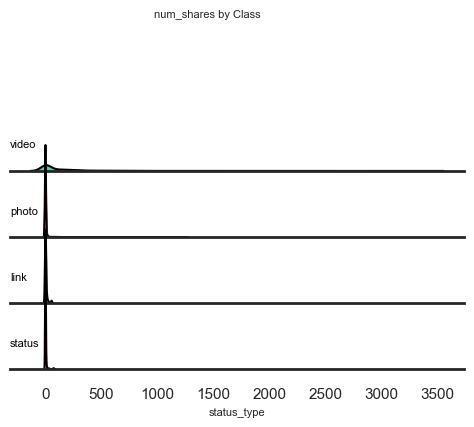

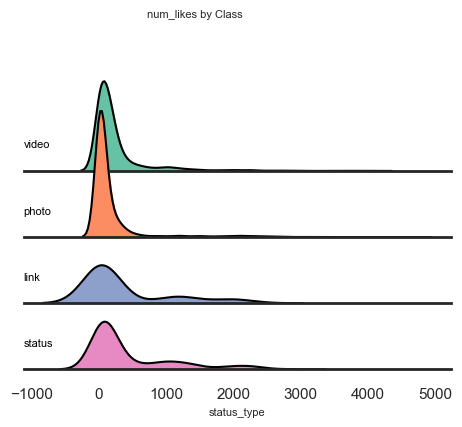

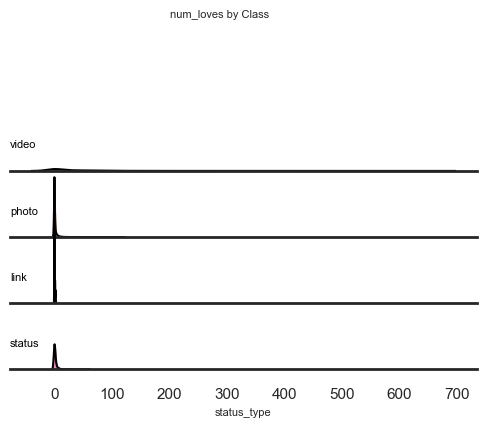

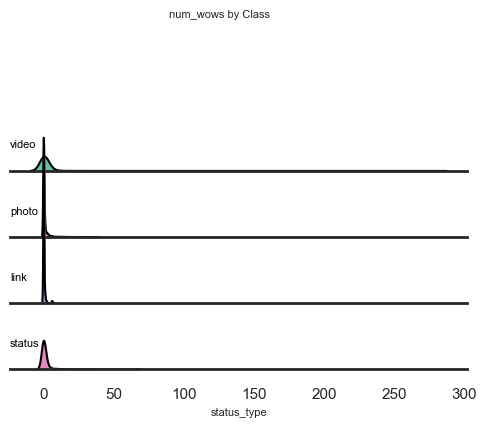

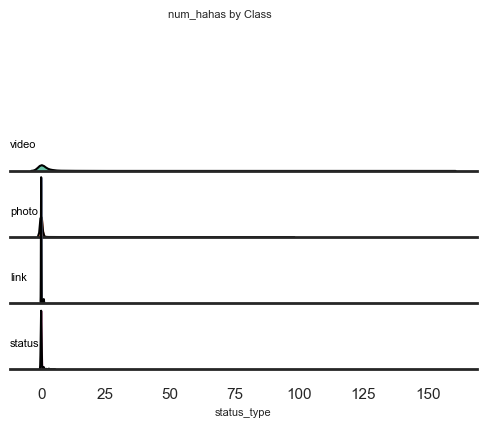

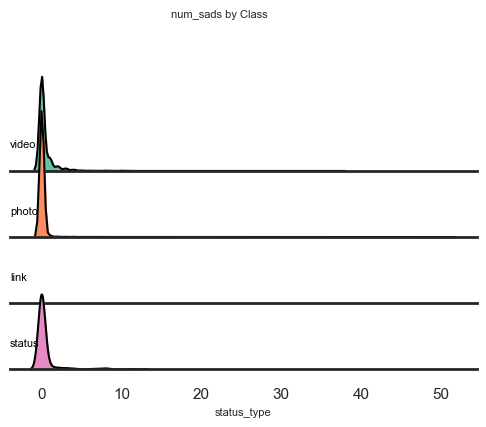

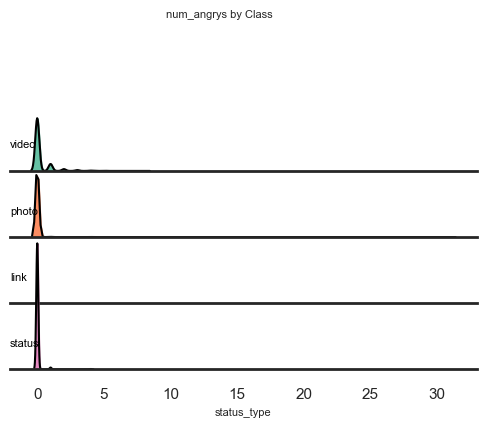

In [31]:
for column in fb_data.drop("period_day", axis=1).columns:
    if column == 'status_type':
        continue
    sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
    palette = sns.color_palette("Set2", 12)
    g = sns.FacetGrid(fb_data.drop("period_day", axis=1), palette=palette, row="status_type", hue="status_type", aspect=5, 
                      height=1.1)
    g.map_dataframe(sns.kdeplot, x=column, fill=True, alpha=1)
    g.map_dataframe(sns.kdeplot, x=column, color='black')
    def label(x, color, label):
        ax = plt.gca()
        ax.text(0, .2, label, color='black', fontsize=8,
                ha="left", va="center", transform=ax.transAxes)

    g.map(label, "status_type")
    g.fig.subplots_adjust(hspace=-.5)
    g.set_titles("")
    g.set(yticks=[], xlabel=column)
    g.set_xlabels(fontsize=8)
    g.set_ylabels(fontsize=8)
    g.despine(left=True)
    plt.suptitle(f'{column} by Class', y=0.98, size=8)
    plt.show()

Los gráficos de densidad de kernel (kdeplot) ofrecen una visión de la forma en que los valores de una variable se distribuyen entre las diferentes tipo de publicaciones. Las áreas bajo las curvas representan la probabilidad de que los valores de una variable estén dentro de un intervalo determinado.

Al comparar las curvas de distribución entre los tipos de publicaciones, es posible identificar las diferencias en la forma y la posición de las curvas. Por ejemplo, si una curva es más ancha que otra, esto puede indicar que los valores de la variable están más dispersos para esa clase en particular.

Del grafico de pairplot tambien se observan que algunas de las variables independientes parecen estar altamente correlacionadas entre sí, tal vez se tengan que realizar algun estudio adicional de multicolinealidad de las variables. Se trazará un mapa de calor para chequear la correlación entre las variables:

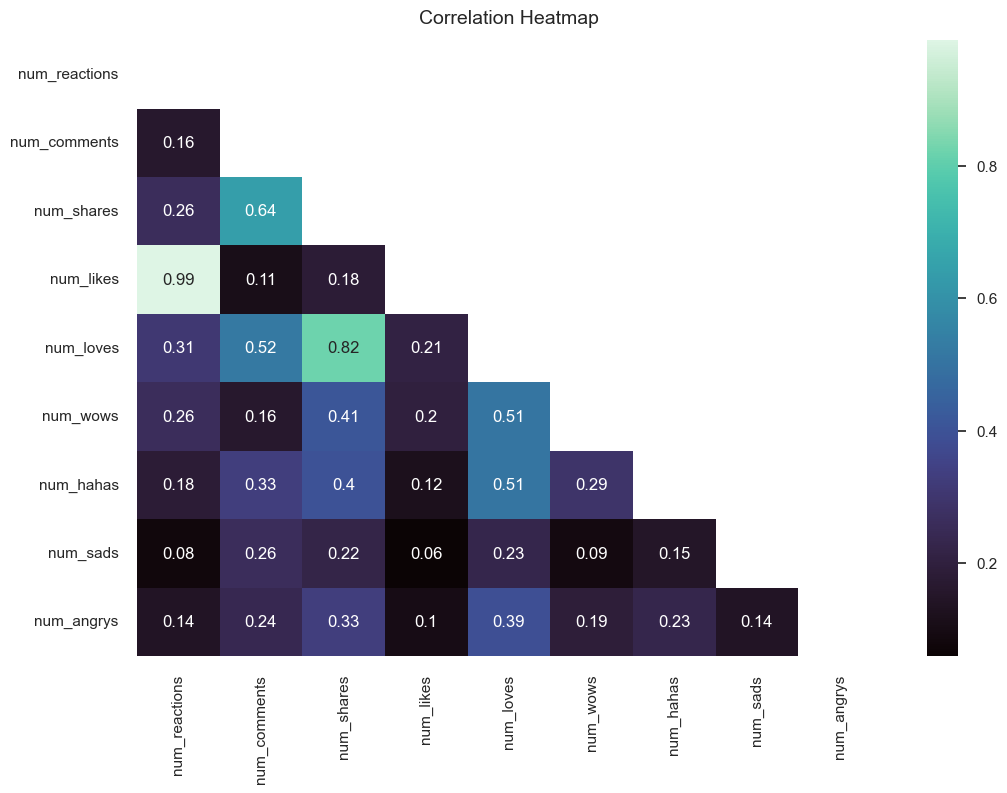

In [32]:
#Correlation Heatmap
plt.figure(figsize=(12, 8))

mask = np.triu(np.ones_like(fb_data.corr().round(2))) 

ax= sns.heatmap(fb_data.corr().round(2), annot = True, cmap="mako", mask=mask)

ax.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

De acuerdo lo mostrado en el gráfico pair plot y el gráfico heatmap, se pueden observar que algunas de las variables presentan correlación entre ellas positivas como lo son el numero de likes con el numero de reacciones (0.99), asi como el numero de loves con el numero de shares, pudiendo inferir que puedan afectar en una multicolinealidad los modelos. 

Se puede realizar el análisis de multicolinealidad para verificar si estas correlaciones pudieran afectar los modelos.

#### Chequear la multicolinealidad de las variables independientes.

In [33]:
VF_eval=fb_data.copy()

In [34]:
#import module to evaluate multicollinearity from the independent variables set
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define a function that loops across al features and show their multicollinearity
def calculate_vif(df, cols): 
    variables = df[cols]
    vif = pd.DataFrame()
    
    vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
    vif['features'] = variables.columns
    return vif

#create the columns
cols = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 
        'num_angrys']   

In [35]:
calculate_vif(VF_eval, cols)

VIF       features
0  3.686168e+07  num_reactions
1  1.908539e+00   num_comments
2  4.180436e+00     num_shares
3  3.420353e+07      num_likes
4  2.555017e+05      num_loves
5  1.119814e+04       num_wows
6  2.342045e+03      num_hahas
7  3.247743e+02       num_sads
8  7.101675e+01     num_angrys

Esta tabla muestra el factor de inflación de varianza (VIF) para cada función en un conjunto de datos relacionado con las características del vino.Como se observa se tienen algunos valores VIF muy grandes, mayores a 10, confirmando la multicolinealidad entre las varaibles independientes.

## 3.3 Análisis de la variable categórica

In [36]:
fb_data.describe(include = 'O').T

count unique            top  freq
status_type  6996      4          photo  4242
period_day   6996      5  early morning  2973

In [37]:
fb_data['status_type'].value_counts()

photo     4242
video     2332
status     359
link        63
Name: status_type, dtype: int64

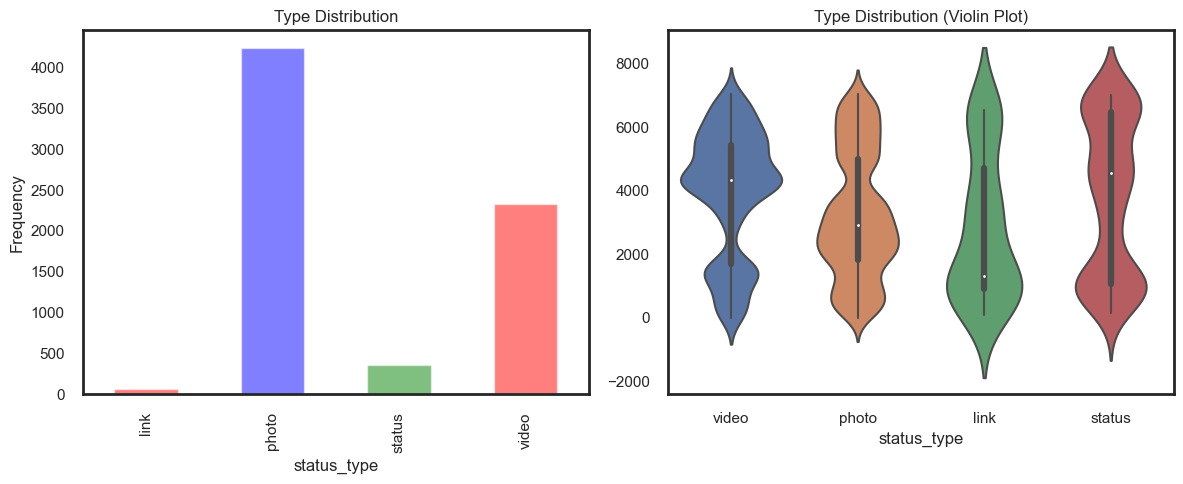

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Bar Plot
class_counts = fb_data['status_type'].value_counts().sort_index()
class_counts.plot.bar(color=['red', 'blue', 'green'], alpha=0.5, ax=axs[0])
axs[0].set_xlabel('status_type')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Type Distribution')

# Violin Plot
sns.violinplot(x='status_type', y=fb_data.index, data=fb_data, ax=axs[1])
axs[1].set_xlabel('status_type')
axs[1].set_ylabel('')
axs[1].set_title('Type Distribution (Violin Plot)')

plt.tight_layout()
plt.show()

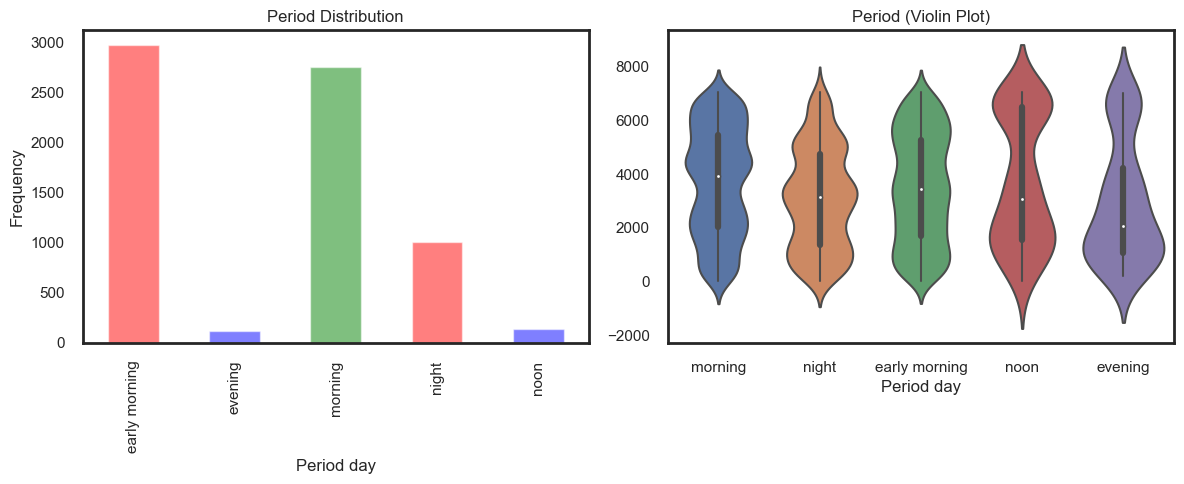

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Bar Plot
class_counts = fb_data['period_day'].value_counts().sort_index()
class_counts.plot.bar(color=['red', 'blue', 'green'], alpha=0.5, ax=axs[0])
axs[0].set_xlabel('Period day')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Period Distribution')

# Violin Plot
sns.violinplot(x='period_day', y=fb_data.index, data=fb_data, ax=axs[1])
axs[1].set_xlabel('Period day')
axs[1].set_ylabel('')
axs[1].set_title('Period (Violin Plot)')

plt.tight_layout()
plt.show()

Este resultado es una descripción estadística de las variables categoricas Tipo de Publicación y el periodo del dia en que se pubica. Hay 6996 valores en total, con 4 valores únicos, y el valor más frecuente es "photo" con 4242 ocurrencias. Se puede ver que el valor "photo" aparece 4242 veces, el valor "video" aparece 2332 veces, el valor "status" aparece 359 veces y el valor "link" aparece 63 veces, esta informacion permite inferir que la distribución de los valores está muy desbalanceado.

Tambien se pued inferir que  el mayor periodo de interacción se encuentra en early morning y morning. 

**Observaciones:**
* El dataset está muy desbalanceado, hay muchos más números de reacciones, de comentarios de shares y de likes que de reacciones específicas como love, haha, angry o sad.

* En el caso de la columna status tipo, se observa que está desbalanceado, principalmente encontramos fotos y vídeos, y secundariamente hay links y status.

* También se observa que no existe mucha correlación entre los datos con algunas excepciones (number of shares - number of loves).

* Las variables numericas no se encuentran normalizadas y presentan outliers en todas las variables.

# 4. Pre-procesamiento

* El estudio se realizará con las variables 'status_type','period_day','num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads' y 'num_angrys'.

* Las variables numéricas: 'num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads' y 'num_angrys', debido que no estan normalizadas y presentan outliers se le aplicará Robust Scaler.

* Las variables categorica: 'status_type','period_day', es necesario codificar, se utilizará Dummies/One Hote ya que los datos no son ordenados.

In [40]:
## Creat a dataframe to transfor with the features
X = fb_data.copy()
X

status_type     period_day  num_reactions  num_comments  num_shares  \
0          video        morning            529           512         262   
1          photo          night            150             0           0   
2          video        morning            227           236          57   
3          photo  early morning            111             0           0   
4          photo  early morning            213             0           0   
...          ...            ...            ...           ...         ...   
7045       photo  early morning             89             0           0   
7046       photo        morning             16             0           0   
7047       photo          night              2             0           0   
7048       photo  early morning            351            12          22   
7049       photo        morning             17             0           0   

      num_likes  num_loves  num_wows  num_hahas  num_sads  num_angrys  
0           432         92         3          1         1           0  
1           150          0         0          0         0           0  
2           204         21         1          1         0           0  
3           111          0         0          0         0           0  
4           204          9         0          0         0           0  
...         ...        ...       ...        ...       ...         ...  
7045         89          0         0          0         0           0  
7046         14          1         0          1         0           0  
7047          1          1         0          0         0           0  
7048        349          2         0          0         0           0  
7049         17          0         0          0         0           0  

[6996 rows x 11 columns]

## 4.1 Normalizar las variables numéricas

In [41]:
rbs_columns = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 
              'num_angrys']


## Normalization with outliers
transformer = preprocessing.RobustScaler()

## Fit and transform the data and put itinplace of the same columns
X[rbs_columns] = transformer.fit_transform(X[rbs_columns])
X

status_type     period_day  num_reactions  num_comments  num_shares  \
0          video        morning       2.366834     22.831461       65.50   
1          photo          night       0.462312     -0.179775        0.00   
2          video        morning       0.849246     10.426966       14.25   
3          photo  early morning       0.266332     -0.179775        0.00   
4          photo  early morning       0.778894     -0.179775        0.00   
...          ...            ...            ...           ...         ...   
7045       photo  early morning       0.155779     -0.179775        0.00   
7046       photo        morning      -0.211055     -0.179775        0.00   
7047       photo          night      -0.281407     -0.179775        0.00   
7048       photo  early morning       1.472362      0.359551        5.50   
7049       photo        morning      -0.206030     -0.179775        0.00   

      num_likes  num_loves  num_wows  num_hahas  num_sads  num_angrys  
0      2.272727  30.666667       3.0        1.0       1.0         0.0  
1      0.563636   0.000000       0.0        0.0       0.0         0.0  
2      0.890909   7.000000       1.0        1.0       0.0         0.0  
3      0.327273   0.000000       0.0        0.0       0.0         0.0  
4      0.890909   3.000000       0.0        0.0       0.0         0.0  
...         ...        ...       ...        ...       ...         ...  
7045   0.193939   0.000000       0.0        0.0       0.0         0.0  
7046  -0.260606   0.333333       0.0        1.0       0.0         0.0  
7047  -0.339394   0.333333       0.0        0.0       0.0         0.0  
7048   1.769697   0.666667       0.0        0.0       0.0         0.0  
7049  -0.242424   0.000000       0.0        0.0       0.0         0.0  

[6996 rows x 11 columns]

Text(0.5, 0.98, 'Visualizing continuous variables')

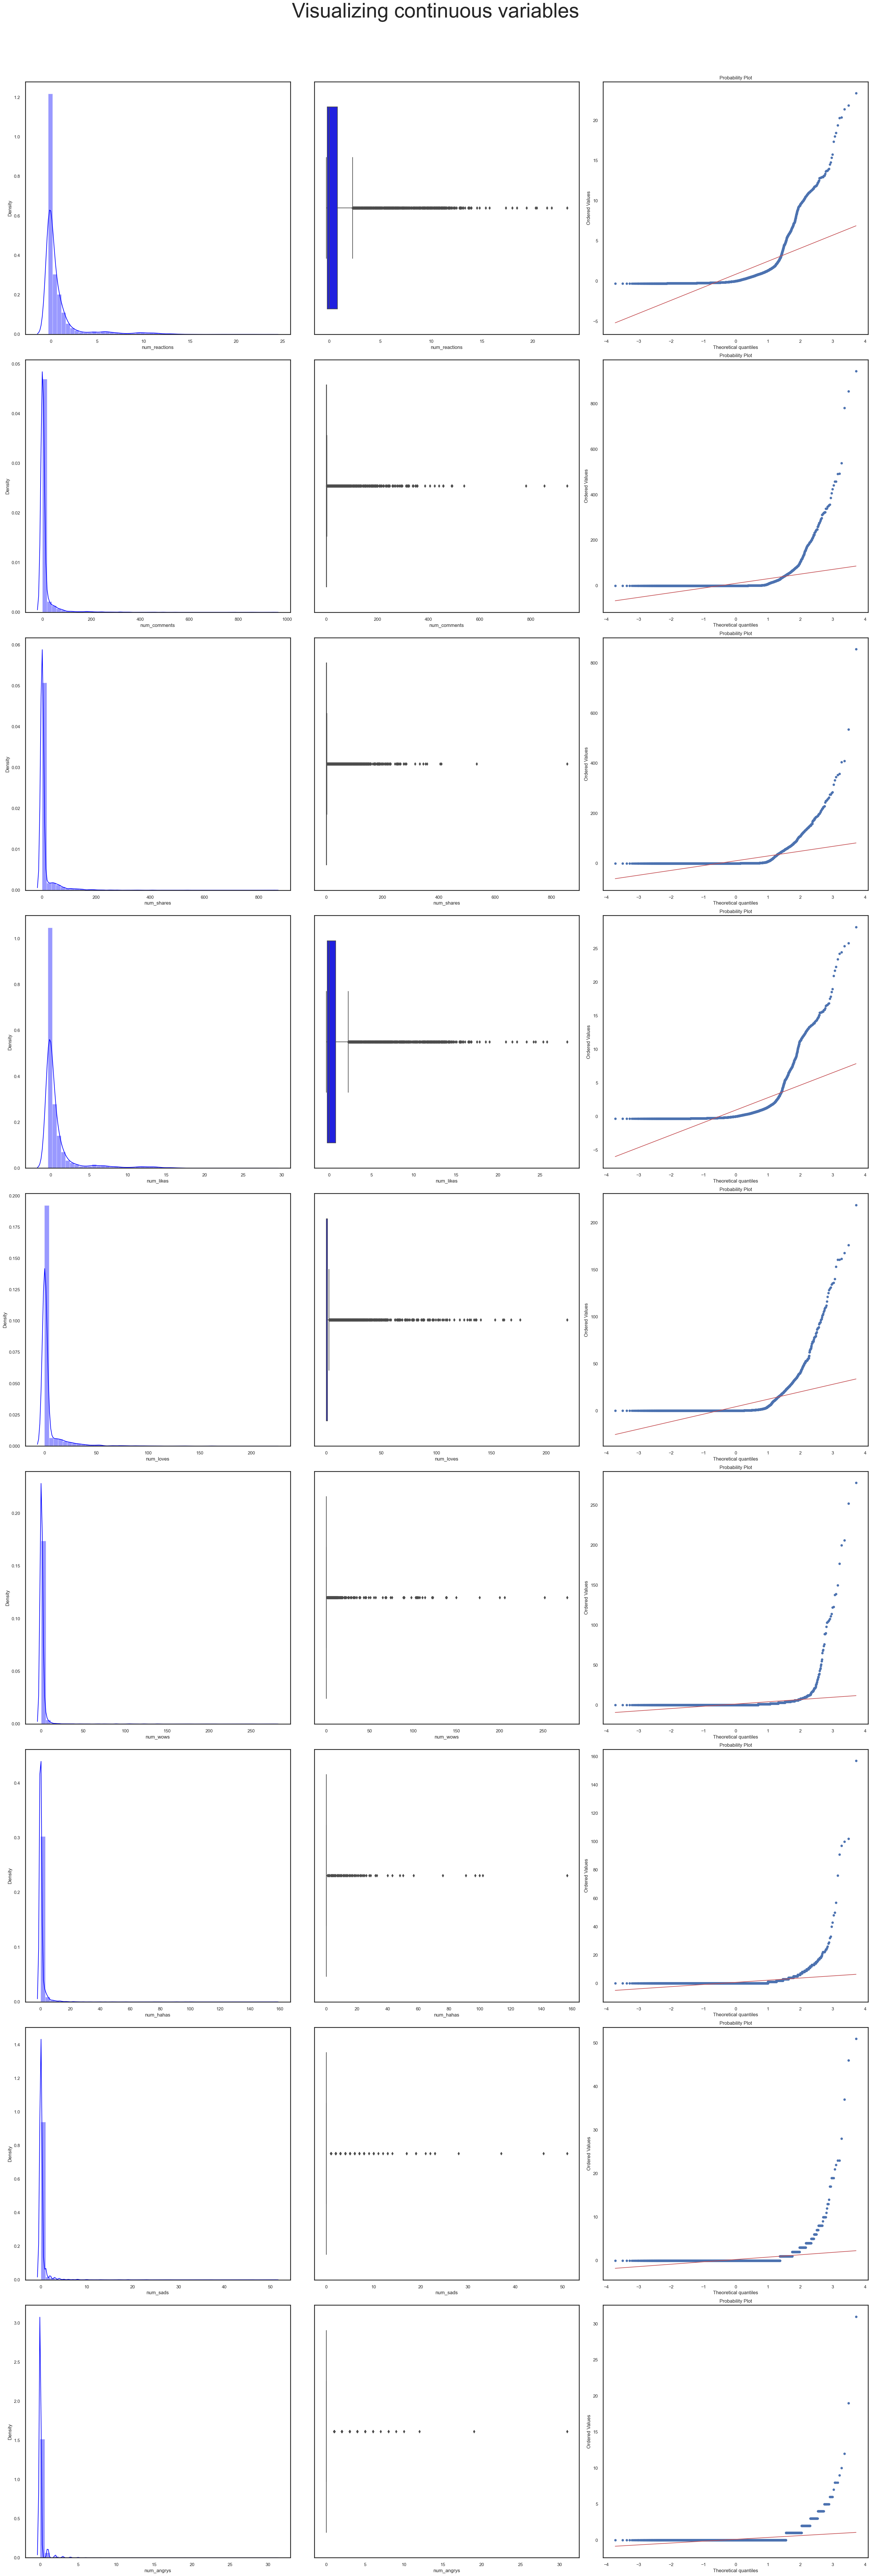

In [45]:
#Visualizing continuous variables
normalize= X[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 
              'num_angrys']]             
    
fig,ax = plt.subplots(9,3,figsize=(30,90))
for index,i in enumerate(normalize.columns):
    sns.distplot(normalize[i],ax=ax[index,0],color='blue')
    sns.boxplot(normalize[i],ax=ax[index,1],color='blue')
    stats.probplot(normalize[i],plot=ax[index,2])
    
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing continuous variables",fontsize=50)

Como se puede observar algunas variables mejoraron su distribucción sin embargo aun mantienen altos valores de outliers.

## 4.2 Tratamiento datos categóricos

Para convertir  datos categóricos en números de las  columnas : 'status_type','period_day' se utilizará la función .get_dummies para convertir el tipo de datos categórico a numérico  y almacenar el marco de datos devuelto.

In [46]:
# Dummies de la variable 'period_day'
periodo_dummies = pd.get_dummies(X['period_day'])

# using pd.concat to concatenate the dataframes 
X = pd.concat([X, periodo_dummies], axis=1).reindex(X.index)

#droping the status_type column 
X = X.drop(['period_day'], axis=1) 
X

status_type  num_reactions  num_comments  num_shares  num_likes  \
0          video       2.366834     22.831461       65.50   2.272727   
1          photo       0.462312     -0.179775        0.00   0.563636   
2          video       0.849246     10.426966       14.25   0.890909   
3          photo       0.266332     -0.179775        0.00   0.327273   
4          photo       0.778894     -0.179775        0.00   0.890909   
...          ...            ...           ...         ...        ...   
7045       photo       0.155779     -0.179775        0.00   0.193939   
7046       photo      -0.211055     -0.179775        0.00  -0.260606   
7047       photo      -0.281407     -0.179775        0.00  -0.339394   
7048       photo       1.472362      0.359551        5.50   1.769697   
7049       photo      -0.206030     -0.179775        0.00  -0.242424   

      num_loves  num_wows  num_hahas  num_sads  num_angrys  early morning  \
0     30.666667       3.0        1.0       1.0         0.0              0   
1      0.000000       0.0        0.0       0.0         0.0              0   
2      7.000000       1.0        1.0       0.0         0.0              0   
3      0.000000       0.0        0.0       0.0         0.0              1   
4      3.000000       0.0        0.0       0.0         0.0              1   
...         ...       ...        ...       ...         ...            ...   
7045   0.000000       0.0        0.0       0.0         0.0              1   
7046   0.333333       0.0        1.0       0.0         0.0              0   
7047   0.333333       0.0        0.0       0.0         0.0              0   
7048   0.666667       0.0        0.0       0.0         0.0              1   
7049   0.000000       0.0        0.0       0.0         0.0              0   

      evening  morning  night  noon  
0           0        1      0     0  
1           0        0      1     0  
2           0        1      0     0  
3           0        0      0     0  
4           0        0      0     0  
...       ...      ...    ...   ...  
7045        0        0      0     0  
7046        0        1      0     0  
7047        0        0      1     0  
7048        0        0      0     0  
7049        0        1      0     0  

[6996 rows x 15 columns]

In [47]:
# Dummies de la variable 'status_type'
status_dummies = pd.get_dummies(X['status_type'])

# using pd.concat to concatenate the dataframes 
X = pd.concat([X, status_dummies], axis=1).reindex(X.index)

#droping the status_type column 
X = X.drop(['status_type'], axis=1) 
X

num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0          2.366834     22.831461       65.50   2.272727  30.666667       3.0   
1          0.462312     -0.179775        0.00   0.563636   0.000000       0.0   
2          0.849246     10.426966       14.25   0.890909   7.000000       1.0   
3          0.266332     -0.179775        0.00   0.327273   0.000000       0.0   
4          0.778894     -0.179775        0.00   0.890909   3.000000       0.0   
...             ...           ...         ...        ...        ...       ...   
7045       0.155779     -0.179775        0.00   0.193939   0.000000       0.0   
7046      -0.211055     -0.179775        0.00  -0.260606   0.333333       0.0   
7047      -0.281407     -0.179775        0.00  -0.339394   0.333333       0.0   
7048       1.472362      0.359551        5.50   1.769697   0.666667       0.0   
7049      -0.206030     -0.179775        0.00  -0.242424   0.000000       0.0   

      num_hahas  num_sads  num_angrys  early morning  evening  morning  night  \
0           1.0       1.0         0.0              0        0        1      0   
1           0.0       0.0         0.0              0        0        0      1   
2           1.0       0.0         0.0              0        0        1      0   
3           0.0       0.0         0.0              1        0        0      0   
4           0.0       0.0         0.0              1        0        0      0   
...         ...       ...         ...            ...      ...      ...    ...   
7045        0.0       0.0         0.0              1        0        0      0   
7046        1.0       0.0         0.0              0        0        1      0   
7047        0.0       0.0         0.0              0        0        0      1   
7048        0.0       0.0         0.0              1        0        0      0   
7049        0.0       0.0         0.0              0        0        1      0   

      noon  link  photo  status  video  
0        0     0      0       0      1  
1        0     0      1       0      0  
2        0     0      0       0      1  
3        0     0      1       0      0  
4        0     0      1       0      0  
...    ...   ...    ...     ...    ...  
7045     0     0      1       0      0  
7046     0     0      1       0      0  
7047     0     0      1       0      0  
7048     0     0      1       0      0  
7049     0     0      1       0      0  

[6996 rows x 18 columns]

In [48]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6996 entries, 0 to 7049
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   num_reactions  6996 non-null   float64
 1   num_comments   6996 non-null   float64
 2   num_shares     6996 non-null   float64
 3   num_likes      6996 non-null   float64
 4   num_loves      6996 non-null   float64
 5   num_wows       6996 non-null   float64
 6   num_hahas      6996 non-null   float64
 7   num_sads       6996 non-null   float64
 8   num_angrys     6996 non-null   float64
 9   early morning  6996 non-null   uint8  
 10  evening        6996 non-null   uint8  
 11  morning        6996 non-null   uint8  
 12  night          6996 non-null   uint8  
 13  noon           6996 non-null   uint8  
 14  link           6996 non-null   uint8  
 15  photo          6996 non-null   uint8  
 16  status         6996 non-null   uint8  
 17  video          6996 non-null   uint8  
dtypes: float

In [49]:
X.describe().round(3).T

count    mean     std    min    25%  50%    75%      max
num_reactions  6996.0   0.840   2.276 -0.291 -0.206  0.0  0.794   23.377
num_comments   6996.0   9.962  40.131 -0.180 -0.180  0.0  0.820  943.191
num_shares     6996.0  10.069  33.018  0.000  0.000  0.0  1.000  856.000
num_likes      6996.0   0.927   2.664 -0.345 -0.242  0.0  0.758   28.200
num_loves      6996.0   4.252  13.372  0.000  0.000  0.0  1.000  219.000
num_wows       6996.0   1.253   8.727  0.000  0.000  0.0  0.000  278.000
num_hahas      6996.0   0.698   3.972  0.000  0.000  0.0  0.000  157.000
num_sads       6996.0   0.233   1.481  0.000  0.000  0.0  0.000   51.000
num_angrys     6996.0   0.110   0.689  0.000  0.000  0.0  0.000   31.000
early morning  6996.0   0.425   0.494  0.000  0.000  0.0  1.000    1.000
evening        6996.0   0.017   0.128  0.000  0.000  0.0  0.000    1.000
morning        6996.0   0.394   0.489  0.000  0.000  0.0  1.000    1.000
night          6996.0   0.144   0.351  0.000  0.000  0.0  0.000    1.000
noon           6996.0   0.020   0.140  0.000  0.000  0.0  0.000    1.000
link           6996.0   0.009   0.094  0.000  0.000  0.0  0.000    1.000
photo          6996.0   0.606   0.489  0.000  0.000  1.0  1.000    1.000
status         6996.0   0.051   0.221  0.000  0.000  0.0  0.000    1.000
video          6996.0   0.333   0.471  0.000  0.000  0.0  1.000    1.000

Esto proporciona una visión general rápida de la distribución de los datos para cada variable. Por ejemplo, para la variable "num_reactions", vemos que hay un total de 6996 datos y la media es 0.840, con una desviación estándar de 2.276. También vemos que el mínimo valor es -0.291 y el máximo es 23.377.

## 4.3 Análisis de componentes principales PCA.

El Análisis de Componentes Principales (PCA, por sus siglas en inglés) es una técnica de reducción de dimensionalidad y visualización de datos en el análisis estadístico. Su objetivo principal es transformar un conjunto de variables correlacionadas en un conjunto de variables no correlacionadas, llamadas componentes principales, que explican la mayor parte de la varianza en los datos. 

Esto se logra mediante la identificación de las direcciones de mayor varianza en los datos y la proyección de los datos en estas direcciones. El PCA es útil para comprender la estructura subyacente de los datos y para representar los datos en un espacio de características más reducido y manejable.

Para aplicar el PCA, se debe seguir los siguientes puntos: 

* Ajustar los datos estandarizados usando PCA

* Decidir cuántas características se deben mantener en función del gráfico de varianza acumulada.

In [50]:
## fit Normalized data using PCA
pca = PCA().fit(X)

In [51]:
## The Cumulative variance show how much variance is explained by each of the n attributs the data have
pca.explained_variance_ratio_

array([7.82904903e-01, 1.70551150e-01, 2.46581156e-02, 1.32179690e-02,
       3.78085238e-03, 3.71991768e-03, 6.76592386e-04, 1.35323334e-04,
       1.33269470e-04, 1.16985283e-04, 6.15458388e-05, 2.37033265e-05,
       9.85821992e-06, 5.97771251e-06, 3.83675603e-06, 3.47294966e-11,
       3.49679917e-36, 2.73734954e-36])

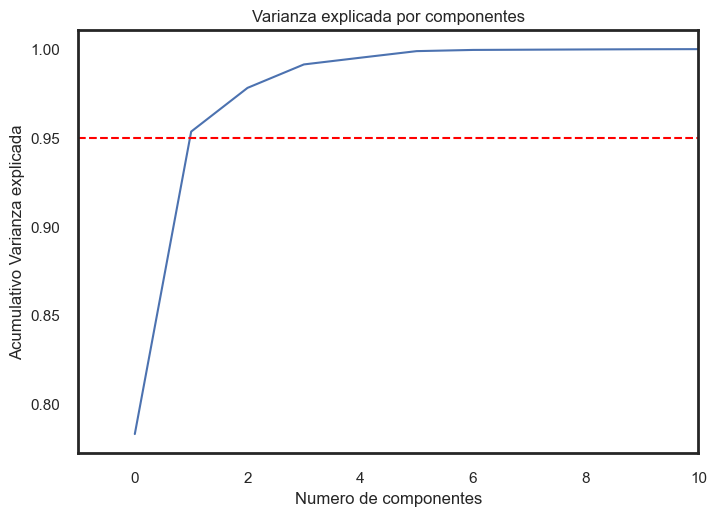

In [52]:
## Plot explained_variance_ratio_
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(0.95, color = "red", linestyle = "--")
plt.xlim([-1, 10])

plt.xlabel('Numero de componentes')
plt.ylabel('Acumulativo Varianza explicada')
plt.title('Varianza explicada por componentes');

El número de componentes para conservar un 95% de la información original podría estar entre 1 y 2.

In [53]:
## Choose the number of components
pca = PCA(n_components = 2)  #

##Now we can fit and transform the data The fit learns some quantities from the data, most importantly the "components" and "explained variance"
X_pca = pca.fit_transform(X)

##Recheck shapes
print(X.shape)
print(X_pca.shape)

(6996, 18)
(6996, 2)


In [54]:
print(pca.components_)
print(pca.explained_variance_)
print(X_pca)

[[ 1.06946619e-02  7.76267161e-01  5.93306514e-01  8.60553283e-03
   2.02066433e-01  5.61200018e-02  3.33084311e-02  8.23305197e-03
   4.46814811e-03 -8.31081136e-04 -9.46950387e-05  1.34830741e-03
  -3.74734522e-04 -4.77967114e-05 -5.35299027e-05 -3.56917079e-03
  -2.84122352e-04  3.90682304e-03]
 [ 1.67392075e-02 -6.27863312e-01  7.10737169e-01  1.40472741e-02
   2.77316731e-01  1.49811344e-01  2.78797578e-02 -1.09840434e-03
   4.75123789e-03 -3.60560021e-05 -6.00178816e-05  9.62608224e-04
  -7.67574706e-04 -9.89596346e-05 -2.60135296e-05 -2.32814347e-03
  -2.40432417e-04  2.59458942e-03]]
[2338.98464763  509.53381572]
[[ 48.36319336  38.95863691]
 [-14.81213049  -2.18987314]
 [  3.3961995    3.41518302]
 ...
 [-14.76049989  -2.12256861]
 [-10.97484817   1.60001702]
 [-14.82449172  -2.21065342]]


# 5. Aplicacion de los modelos

## 5.1 Ejercicio 1: Aplicar algoritmo K-means

* **Ejercicio 1:**  Descargar el dataset adjunto, de registros de publicaciones en Facebook sobre Tailandia, y clasifica los diferentes registros utilizando el algoritmo de K-means.

Para emplear el algoritmo K-means, es esencial determinar la cantidad de K (clusters) que se utilizarán. Para ello, se aplicará "Elbow Method" con el fin de encontrar la cantidad óptima de clusters.

Este proceso se lleva a cabo mediante la ejecución del algoritmo con diferentes números de grupos. Posteriormente, se evalúa la suma de los cuadrados dentro del cluster o WCSS para cada solución. Con base en los resultados obtenidos del WCSS y la utilización del método Elbow, se tomará una decisión acerca de la cantidad de clusters que se desea conservar.

Antes de continuar, es necesario decidir el número de soluciones de agrupamiento que se deben probar. No existe una regla universal que lo establezca, ya que depende de los datos a tratar. En nuestro caso, se ha decidido probar el algoritmo con hasta 10 clusters.

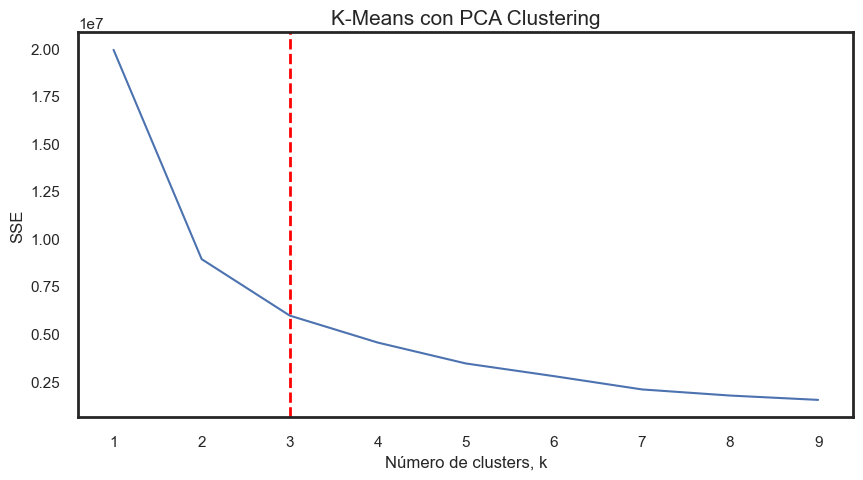

In [55]:
ks = range(1, 10)
# SSE es (Sum of Squared errors)
SSE = []

for i in range(1, 10):
    # Create a KMeans instance with k clusters: model
    kmeans = KMeans(n_clusters=i, random_state= 42)
    
    # Fit model to samples
    kmeans.fit(X_pca)
    
    # Append the inertia to the list of inertias
    SSE.append(kmeans.inertia_)
    
plt.figure(figsize=(10,5))    
plt.plot(ks, SSE, '-o', marker='x')
plt.axvline(x = 3, ymin = 0, color = 'red', linewidth =2, ls = '--' )
plt.xlabel('Número de clusters, k')
plt.ylabel('SSE')
plt.title('K-Means con PCA Clustering', fontsize=15)
plt.xticks(ks)
plt.show()

In [56]:
from kneed import KneeLocator

kl = KneeLocator(ks, SSE, curve="convex", direction="decreasing")


print('Número de clusters convenientes:', kl.elbow)
kl.elbow

Número de clusters convenientes: 3


3

In [57]:
## I inicialice the Kmeans clustering with 3 clusters
kmeans_pca = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)

##Fit the kmeans to the data to find the clusters
kmeans_pca.fit(X_pca)

KMeans(n_clusters=3, random_state=42)

In [58]:
## The kmeans resulting labels and cluster centers
kmeans_pca_labels = kmeans_pca.labels_
cluster_centers = kmeans_pca.cluster_centers_

In [59]:
print(kmeans_pca_labels)
print(cluster_centers)

[1 0 0 ... 0 0 0]
[[-11.04981427  -1.16925395]
 [ 99.70749087  24.62684088]
 [331.93325106 -57.73931489]]


In [60]:
# Calculate silhouette score
ss_all = []
for n in range(2, 11):
    km = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300, 
                        tol=0.0001, random_state= 19))
    predict = km.fit_predict(X_pca)
    score = silhouette_score(X = X_pca, labels = predict)
    ss_all.append(score)

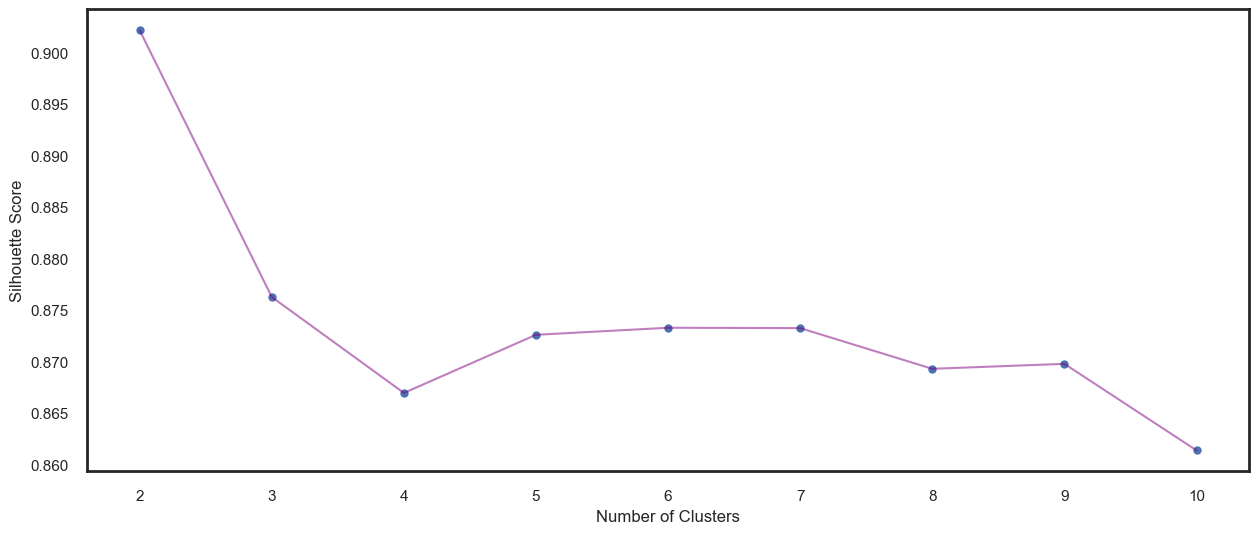

In [61]:
## Plot the number of clusters vs the silhouette score for the dataset.
##from https://statisticallyrelevant.com/k-means-clustering-in-python/
plt.figure(figsize = (15 ,6))
plt.plot(np.arange(2 , 11) , ss_all , 'o')
#plt.plot(np.arange(2 , 11) , ss_all , 'o', label = "Combined") ##plot with label
plt.plot(np.arange(2 , 11) , ss_all , '-' , alpha = 0.5, color = 'purple')
#plt.legend()
plt.xlabel('Number of Clusters') , plt.ylabel('Silhouette Score')
plt.show()

**Observaciones**: 

* En caso de aplicar la Siluette, se observa que el número de cluster óptimo es 2.

* Se creará un nuevo marco de datos, que permita agregar los valores de los componentes separados al dataset de segmentación.

* Las puntuaciones de los componentes se almacenan en la variable 'X_pca'.

* Vamos a etiquetarlos Componente 1, 2. Además, también agregamos las etiquetas 'K significa P C A' al nuevo marco de datos.

In [62]:
X_pca
## The kmeans resulting labels and cluster centers
kmeans_pca_labels = kmeans_pca.labels_
cluster_centers = kmeans_pca.cluster_centers_

In [63]:
## We concatenate to X the x_pca 2 components (1st converting them to a dataframe)
X_pca_kmeans = pd.concat([X.reset_index(drop= True), pd.DataFrame(X_pca)], axis=1)
X_pca_kmeans.columns.values[-2:] = ['Component_1', 'Component_2']

## Last column we add contains the pca k-means clustering labels
X_pca_kmeans['Cluster_k-Means_PCA'] = kmeans_pca.labels_

In [64]:
X_pca_kmeans

num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0          2.366834     22.831461       65.50   2.272727  30.666667       3.0   
1          0.462312     -0.179775        0.00   0.563636   0.000000       0.0   
2          0.849246     10.426966       14.25   0.890909   7.000000       1.0   
3          0.266332     -0.179775        0.00   0.327273   0.000000       0.0   
4          0.778894     -0.179775        0.00   0.890909   3.000000       0.0   
...             ...           ...         ...        ...        ...       ...   
6991       0.155779     -0.179775        0.00   0.193939   0.000000       0.0   
6992      -0.211055     -0.179775        0.00  -0.260606   0.333333       0.0   
6993      -0.281407     -0.179775        0.00  -0.339394   0.333333       0.0   
6994       1.472362      0.359551        5.50   1.769697   0.666667       0.0   
6995      -0.206030     -0.179775        0.00  -0.242424   0.000000       0.0   

      num_hahas  num_sads  num_angrys  early morning  ...  morning  night  \
0           1.0       1.0         0.0              0  ...        1      0   
1           0.0       0.0         0.0              0  ...        0      1   
2           1.0       0.0         0.0              0  ...        1      0   
3           0.0       0.0         0.0              1  ...        0      0   
4           0.0       0.0         0.0              1  ...        0      0   
...         ...       ...         ...            ...  ...      ...    ...   
6991        0.0       0.0         0.0              1  ...        0      0   
6992        1.0       0.0         0.0              0  ...        1      0   
6993        0.0       0.0         0.0              0  ...        0      1   
6994        0.0       0.0         0.0              1  ...        0      0   
6995        0.0       0.0         0.0              0  ...        1      0   

      noon  link  photo  status  video  Component_1  Component_2  \
0        0     0      0       0      1    48.363193    38.958637   
1        0     0      1       0      0   -14.812130    -2.189873   
2        0     0      0       0      1     3.396200     3.415183   
3        0     0      1       0      0   -14.816717    -2.195742   
4        0     0      1       0      0   -14.200185    -1.347295   
...    ...   ...    ...     ...    ...          ...          ...   
6991     0     0      1       0      0   -14.819047    -2.199466   
6992     0     0      1       0      0   -14.724038    -2.090674   
6993     0     0      1       0      0   -14.760500    -2.122569   
6994     0     0      1       0      0   -10.974848     1.600017   
6995     0     0      1       0      0   -14.824492    -2.210653   

      Cluster_k-Means_PCA  
0                       1  
1                       0  
2                       0  
3                       0  
4                       0  
...                   ...  
6991                    0  
6992                    0  
6993                    0  
6994                    0  
6995                    0  

[6996 rows x 21 columns]

In [65]:
X_pca_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6996 entries, 0 to 6995
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   num_reactions        6996 non-null   float64
 1   num_comments         6996 non-null   float64
 2   num_shares           6996 non-null   float64
 3   num_likes            6996 non-null   float64
 4   num_loves            6996 non-null   float64
 5   num_wows             6996 non-null   float64
 6   num_hahas            6996 non-null   float64
 7   num_sads             6996 non-null   float64
 8   num_angrys           6996 non-null   float64
 9   early morning        6996 non-null   uint8  
 10  evening              6996 non-null   uint8  
 11  morning              6996 non-null   uint8  
 12  night                6996 non-null   uint8  
 13  noon                 6996 non-null   uint8  
 14  link                 6996 non-null   uint8  
 15  photo                6996 non-null   u

* **Visualización de cada distribución de características por clúster:**

In [66]:
X_pca_kmeans['Cluster_k-Means_PCA'].value_counts()

0    6449
1     475
2      72
Name: Cluster_k-Means_PCA, dtype: int64

<AxesSubplot:xlabel='Cluster_k-Means_PCA', ylabel='count'>

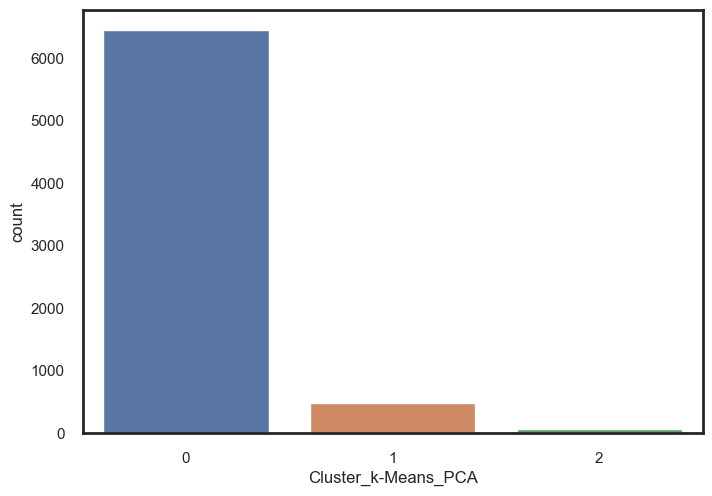

In [67]:
sns.countplot(x = X_pca_kmeans['Cluster_k-Means_PCA'])

En la gráfica se observan los 3 clusters formados y una acumulación de datos en el Cluster 0, cerca del 90% de los registros pertenecen a este ultimo.

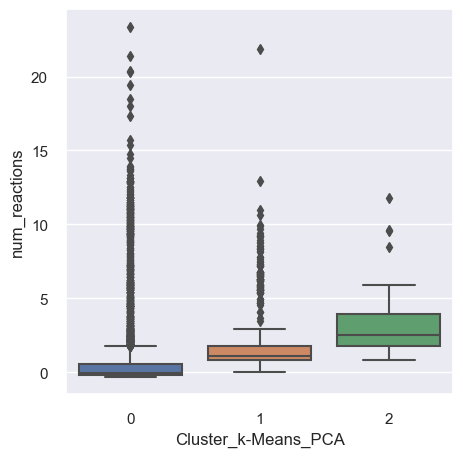

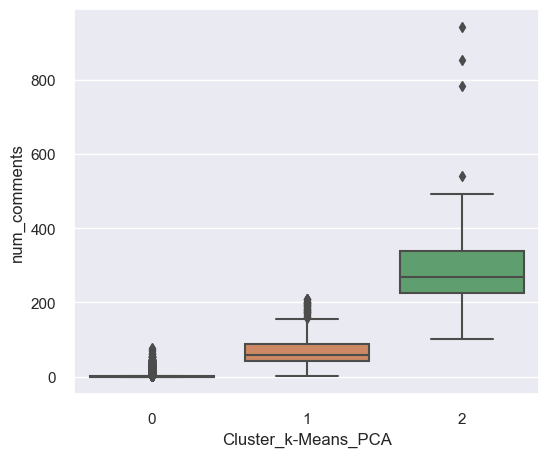

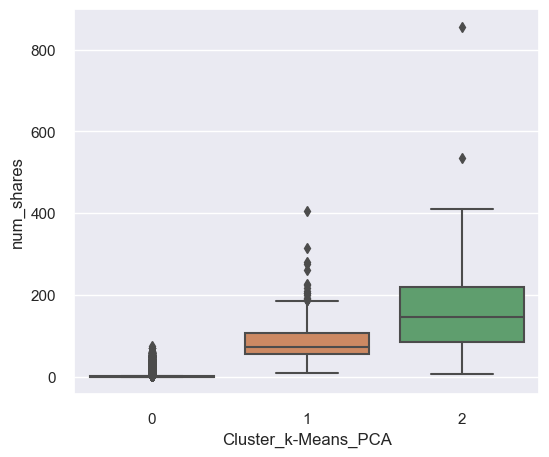

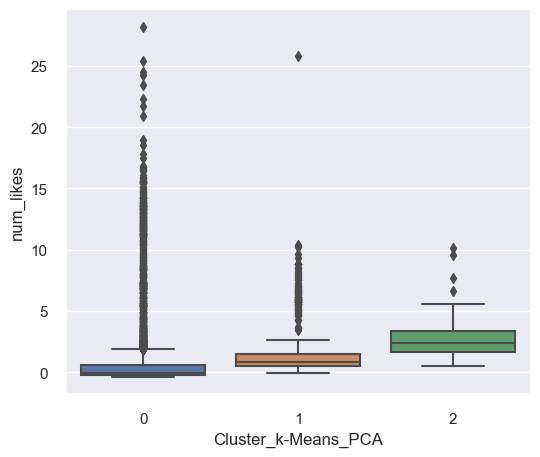

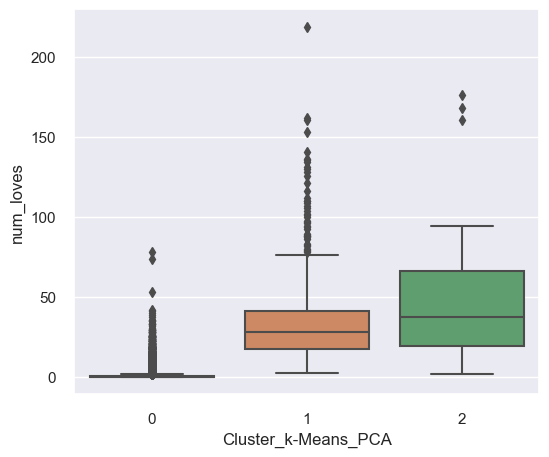

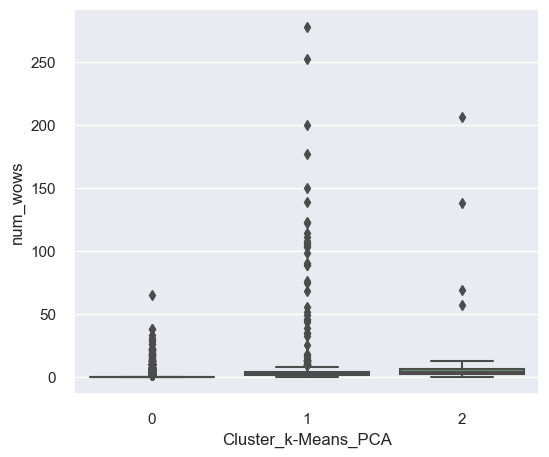

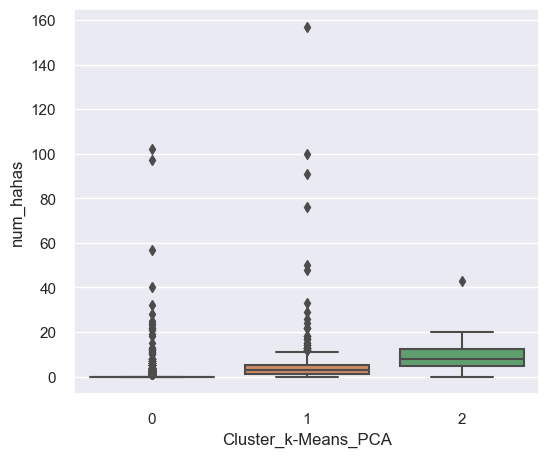

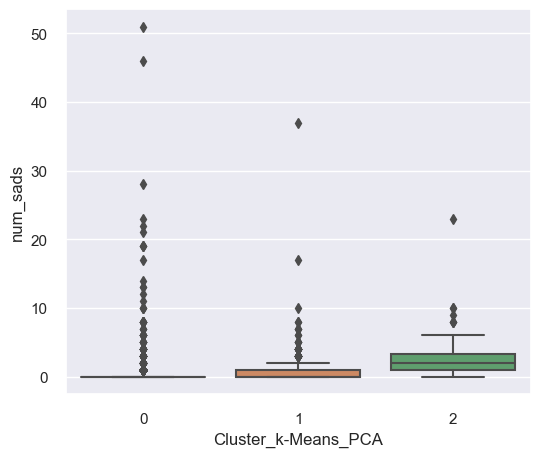

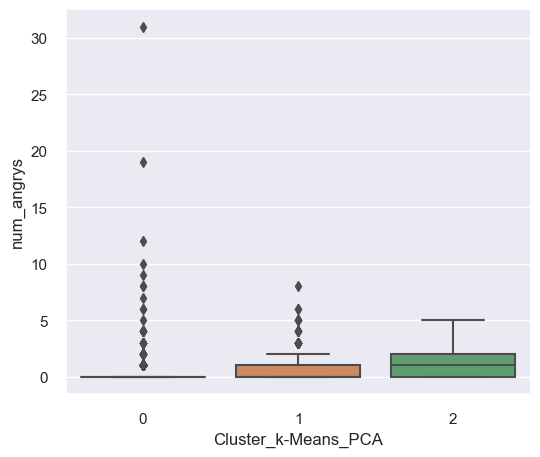

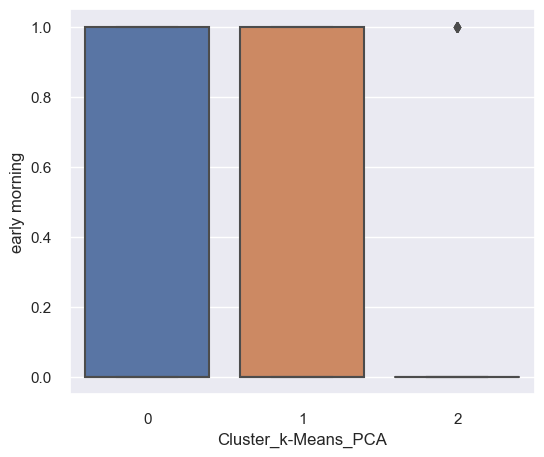

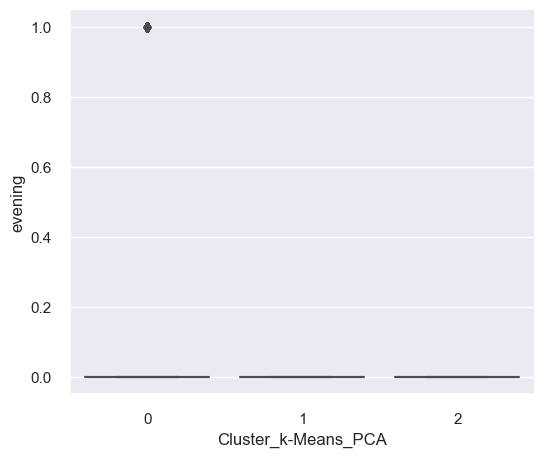

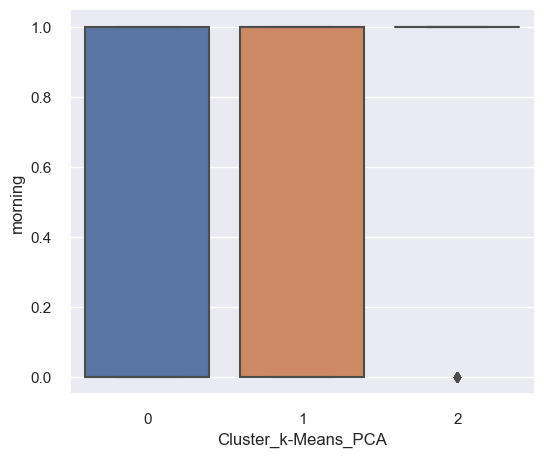

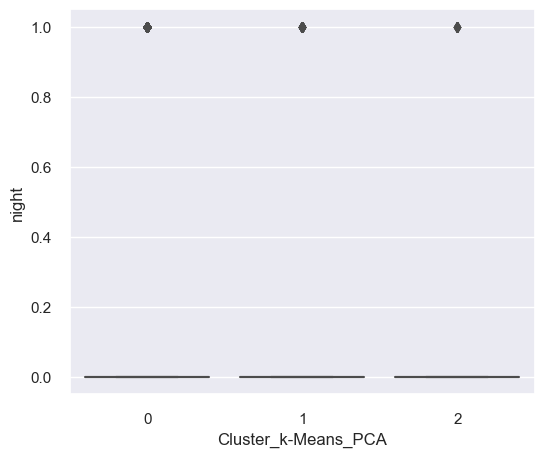

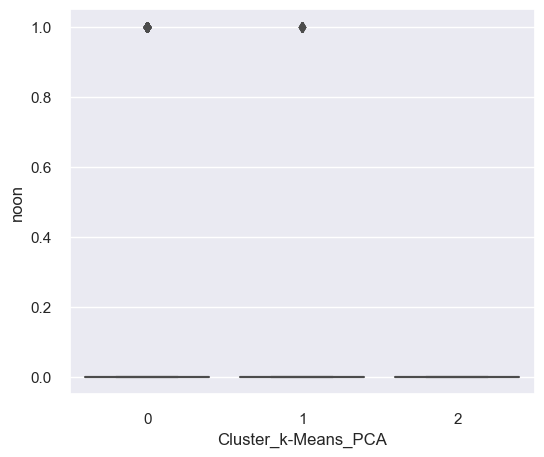

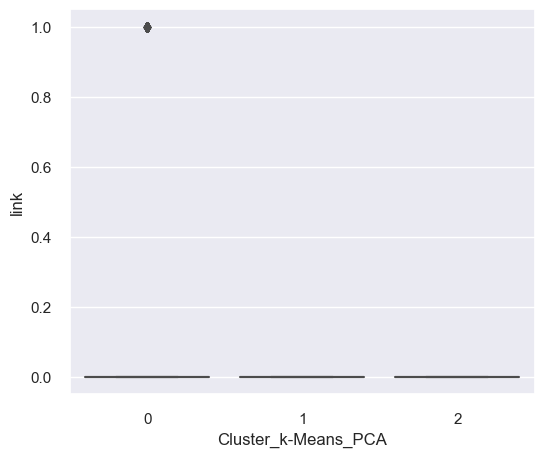

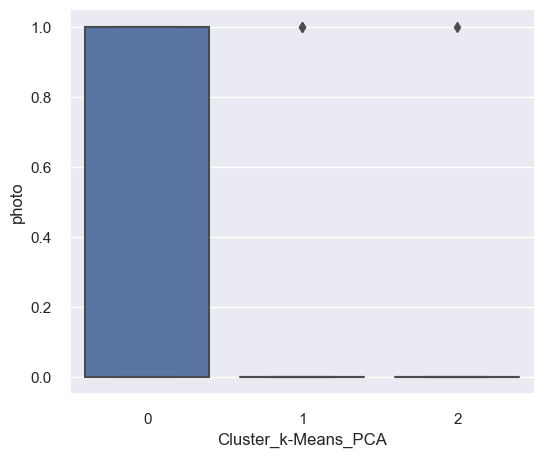

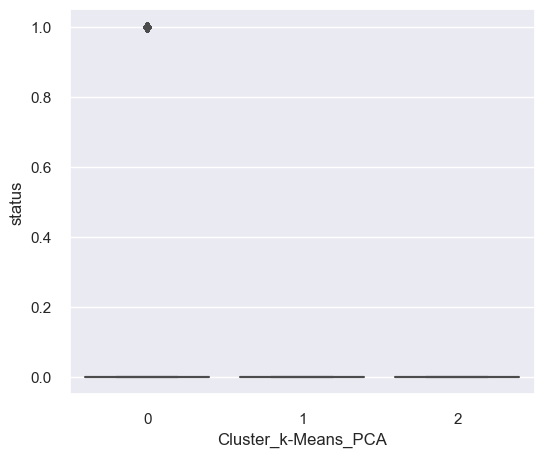

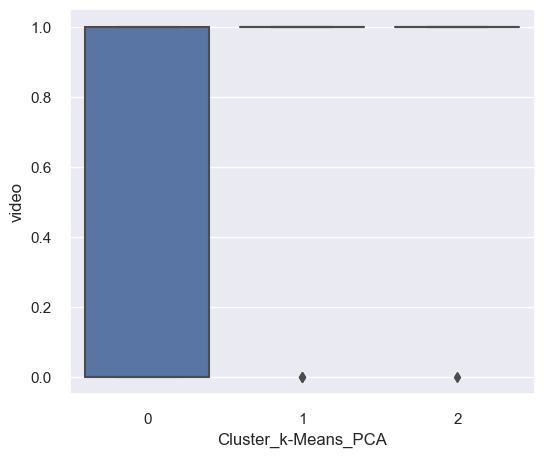

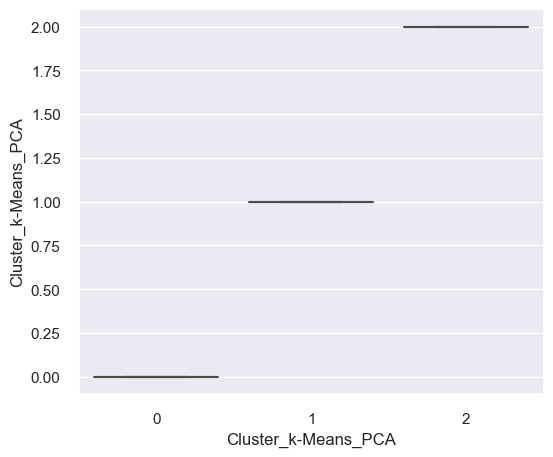

In [75]:
columns_to_drop = ['Component_1', 'Component_2']
X_pca_kmeans_filtered = X_pca_kmeans.drop(columns_to_drop, axis=1)
    
columns = X_pca_kmeans_filtered.columns
for i in columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(6, 5)})
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(x='Cluster_k-Means_PCA', y=i, data=X_pca_kmeans_filtered)

En la gráfica se observan diferencias en las medias de los clusters, por lo que se concluye que el factor principal que ha tomado el modelo para hacer la clusterización es el número de comenterios.

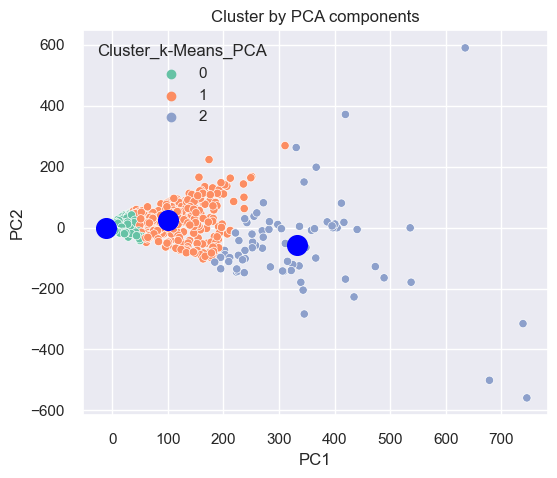

In [76]:
# Plotting the data points colored by the cluster labels
sns.scatterplot(data=X_pca_kmeans, x="Component_1", y="Component_2", hue="Cluster_k-Means_PCA", palette= "Set2")

# Superimpose the cluster centers as points
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='o', c="blue", alpha=1, s=200)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title('Cluster by PCA components')
plt.show()

Este gráfico representa un scatter plot que ilustra los puntos de datos en dos dimensiones, las cuales se corresponden con los dos primeros componentes principales (PC1 y PC2) obtenidos a través de un análisis de componentes principales (PCA). Los puntos de datos están coloreados según la etiqueta de clúster asignada por el algoritmo k-means. Los centros de los clústeres son superpuestos como puntos azules en el gráfico, y su posición indica la media de los puntos de datos en el clúster correspondiente. 

La intención de este gráfico es visualizar cómo los datos se agrupan en diferentes clústeres, y cómo los centros de los clústeres se relacionan con los puntos de datos en el espacio de dos dimensiones.

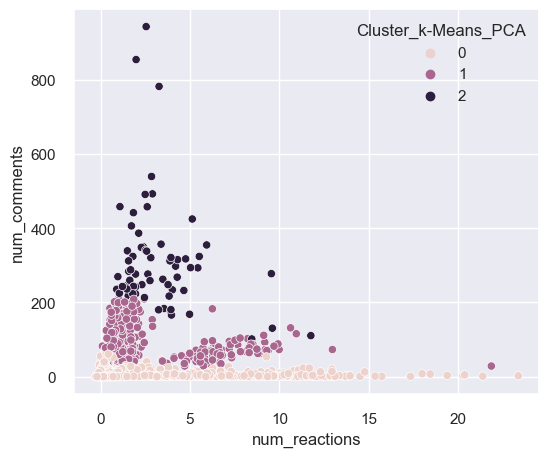

In [77]:
sns.scatterplot(x='num_reactions', y='num_comments', data=X_pca_kmeans, hue='Cluster_k-Means_PCA')
plt.show()

Este gráfico ilustra la relación entre dos de las variables más relevantes de nuestros datos: el número de reacciones y el número de comentarios. Además, los puntos en el gráfico están coloreados según a qué cluster pertenecen según el algoritmo k-means con componentes principales (PCA). Esto nos permite ver cómo los diferentes grupos se diferencian en términos de estas dos variables y cómo la clusterización influye en su relación.

## 5.2 Ejercicio 2: Clasificar con el algoritmo de clustering jerárquico.

El análisis de clustering jerárquico es una técnica de agrupamiento de datos que permite clasificar registros en diferentes grupos o clusters basados en su similitud. Esta técnica es útil cuando se desea identificar patrones o relaciones en grandes cantidades de datos y es especialmente útil en situaciones en las que no se conoce el número exacto de clusters que existen.

El resultado de este análisis proporciona una representación visual de la estructura de los datos, permitiendo a los gerentes tener una mejor comprensión de las relaciones entre los registros y, por lo tanto, tomar decisiones informadas sobre la gestión de su negocio.

* **Ejercicio N°2**: Clasifica los distintos registros utilizando el algoritmo de clustering jerárquico.

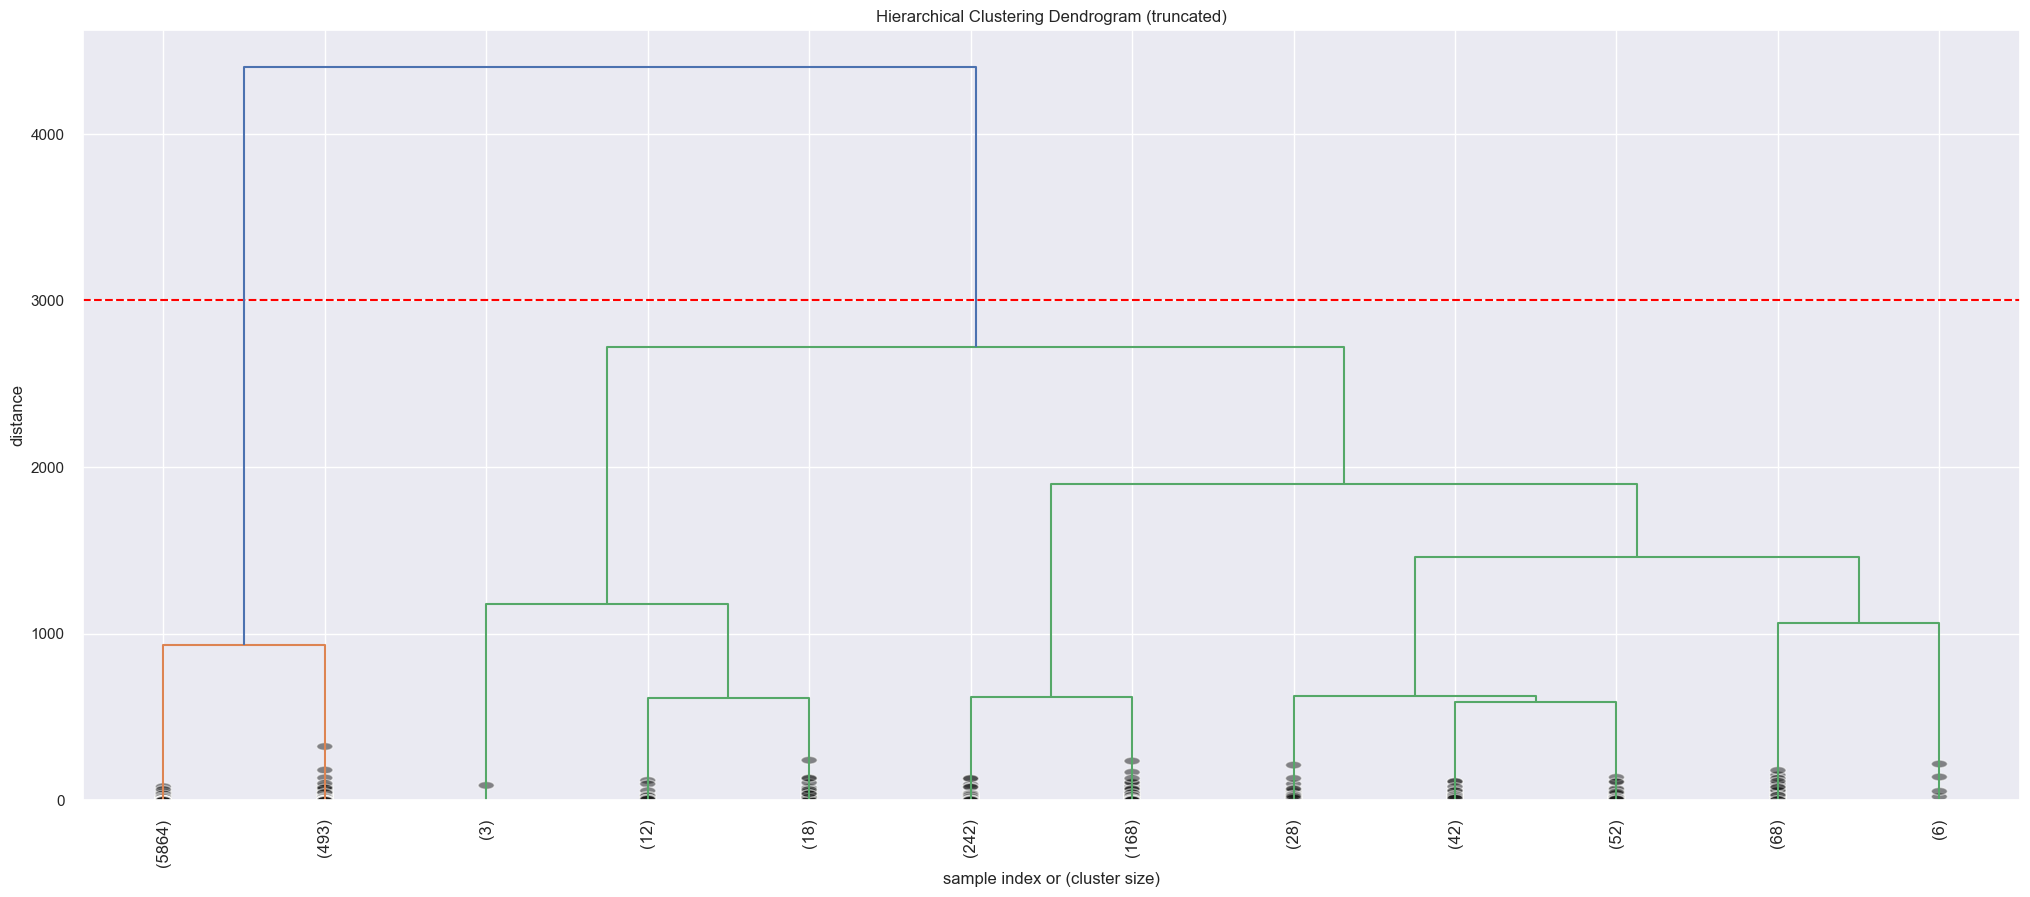

In [85]:
##Dendograma plot
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
plt.axhline(y=3000, color='red', linestyle='--')
dendrogram = sch.dendrogram(
    sch.linkage(X_pca, method='ward'),
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)

En el análisis de agrupamiento jerárquico, la distancia entre las muestras se representa mediante un dendograma. Este gráfico permite visualizar de manera clara la relación y distancia entre las diferentes muestras. En el dendograma, la mayor distancia entre las muestras se marca con una línea roja discontinua, que se utiliza como punto de corte para determinar los clústeres.

La separación más evidente entre las muestras en el dendograma está demarcada por una línea interrumpida en color rojo. Este trazo se extiende a través de dos ramas en el dendograma, lo que indica que se han identificado dos grupos distintos.

* **Modelo: Aglomerativo**

In [86]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit(X_pca)
labels = model.labels_

In [87]:
#labels.min()
X_pca

array([[ 48.36319336,  38.95863691],
       [-14.81213049,  -2.18987314],
       [  3.3961995 ,   3.41518302],
       ...,
       [-14.76049989,  -2.12256861],
       [-10.97484817,   1.60001702],
       [-14.82449172,  -2.21065342]])

In [90]:
X_Hierarchy = X.copy()
X_Hierarchy = pd.concat([X_Hierarchy.reset_index(drop= True), pd.DataFrame(labels)], axis=1)

# df_pca_kmeans.columns.values[-2:] = ['Component_1', 'Component_2']
#X_Hieri.drop(axis=1)
X_Hierarchy['labels'] = labels
X_Hierarchy

num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0          2.366834     22.831461       65.50   2.272727  30.666667       3.0   
1          0.462312     -0.179775        0.00   0.563636   0.000000       0.0   
2          0.849246     10.426966       14.25   0.890909   7.000000       1.0   
3          0.266332     -0.179775        0.00   0.327273   0.000000       0.0   
4          0.778894     -0.179775        0.00   0.890909   3.000000       0.0   
...             ...           ...         ...        ...        ...       ...   
6991       0.155779     -0.179775        0.00   0.193939   0.000000       0.0   
6992      -0.211055     -0.179775        0.00  -0.260606   0.333333       0.0   
6993      -0.281407     -0.179775        0.00  -0.339394   0.333333       0.0   
6994       1.472362      0.359551        5.50   1.769697   0.666667       0.0   
6995      -0.206030     -0.179775        0.00  -0.242424   0.000000       0.0   

      num_hahas  num_sads  num_angrys  early morning  evening  morning  night  \
0           1.0       1.0         0.0              0        0        1      0   
1           0.0       0.0         0.0              0        0        0      1   
2           1.0       0.0         0.0              0        0        1      0   
3           0.0       0.0         0.0              1        0        0      0   
4           0.0       0.0         0.0              1        0        0      0   
...         ...       ...         ...            ...      ...      ...    ...   
6991        0.0       0.0         0.0              1        0        0      0   
6992        1.0       0.0         0.0              0        0        1      0   
6993        0.0       0.0         0.0              0        0        0      1   
6994        0.0       0.0         0.0              1        0        0      0   
6995        0.0       0.0         0.0              0        0        1      0   

      noon  link  photo  status  video  0  labels  
0        0     0      0       0      1  0       0  
1        0     0      1       0      0  1       1  
2        0     0      0       0      1  1       1  
3        0     0      1       0      0  1       1  
4        0     0      1       0      0  1       1  
...    ...   ...    ...     ...    ... ..     ...  
6991     0     0      1       0      0  1       1  
6992     0     0      1       0      0  1       1  
6993     0     0      1       0      0  1       1  
6994     0     0      1       0      0  1       1  
6995     0     0      1       0      0  1       1  

[6996 rows x 20 columns]

* **Visualización**

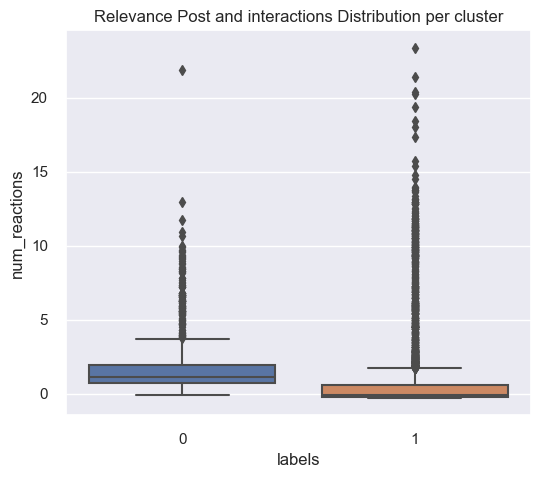

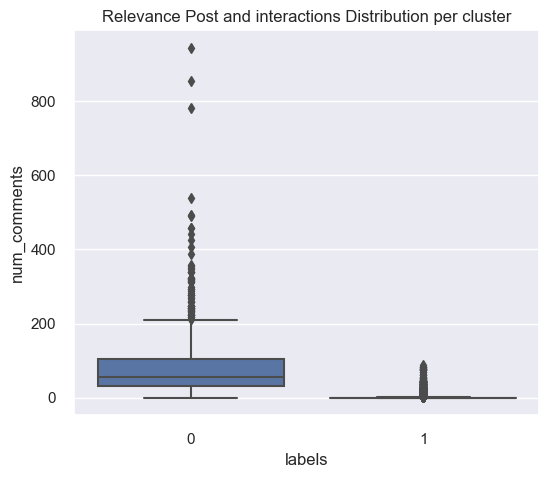

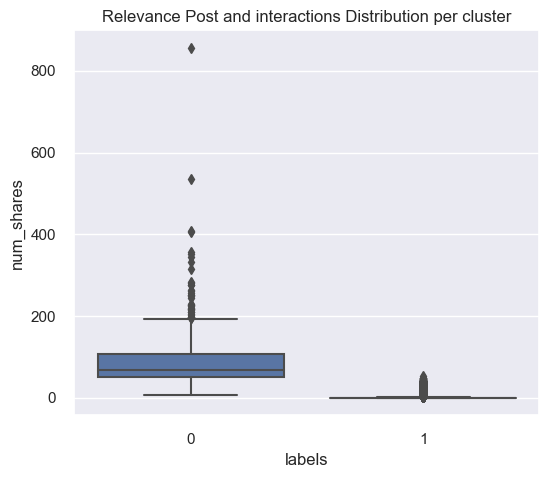

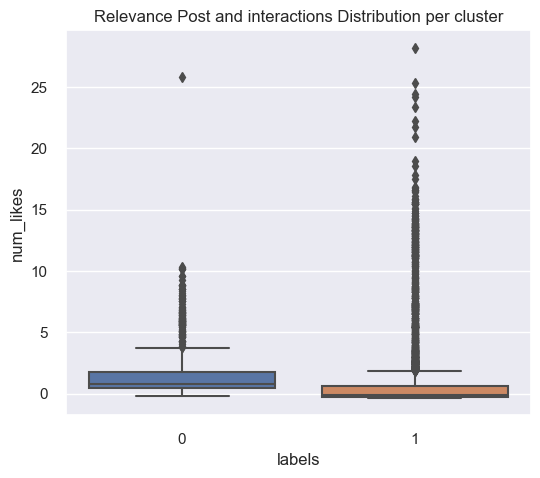

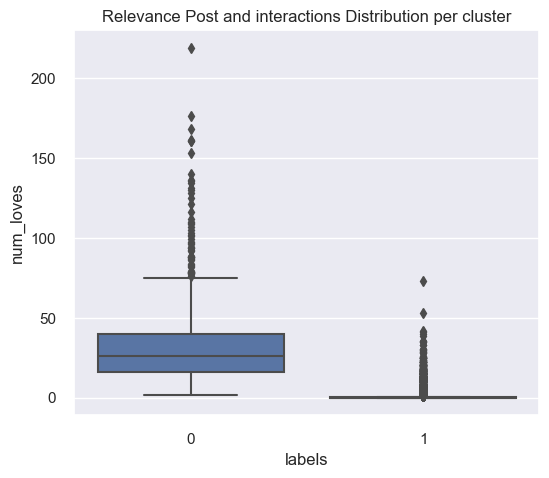

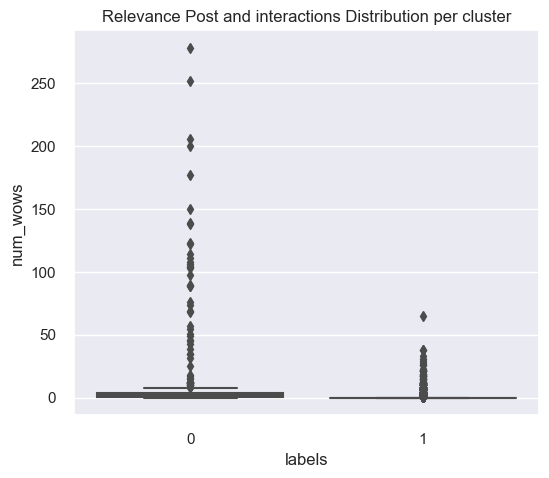

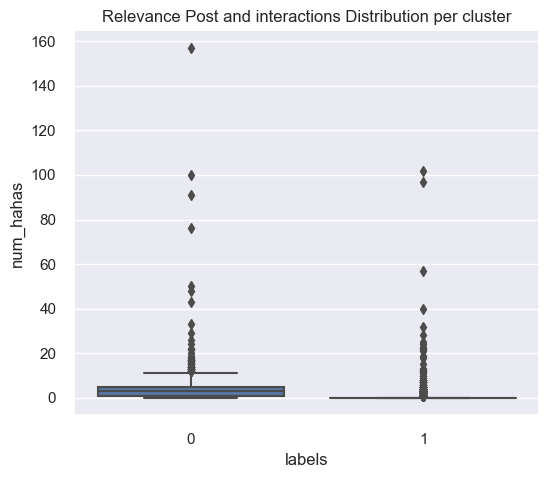

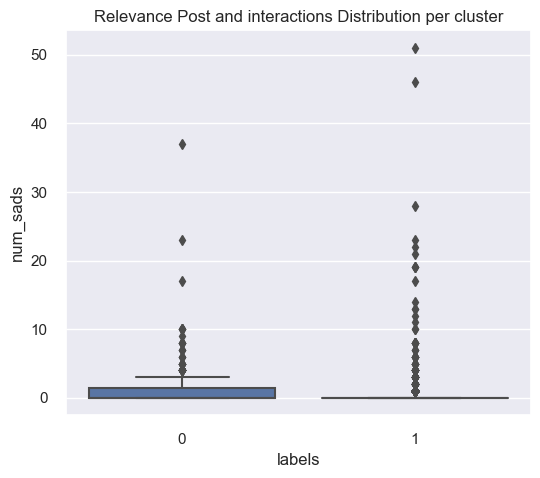

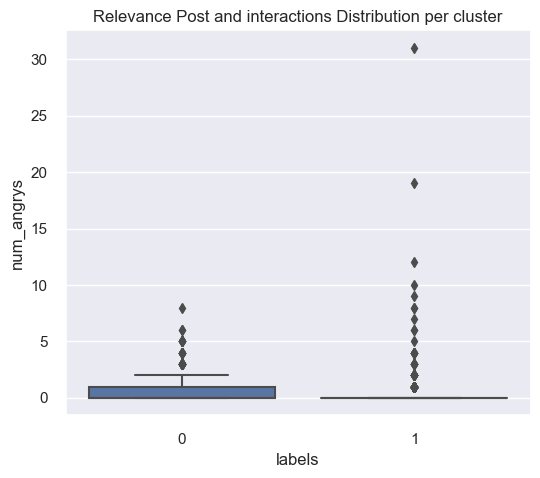

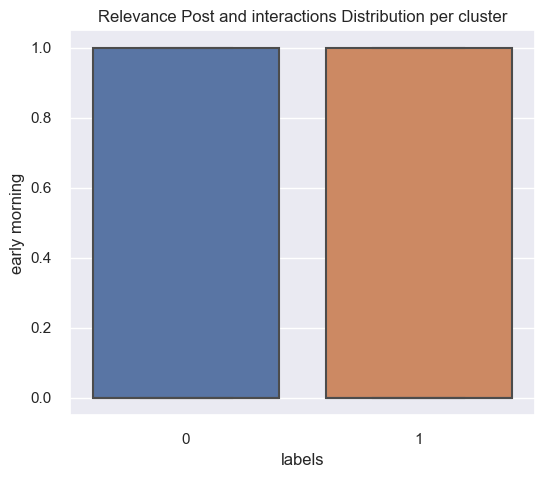

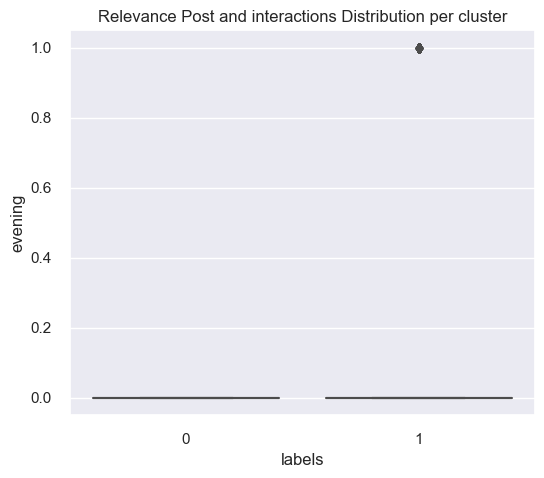

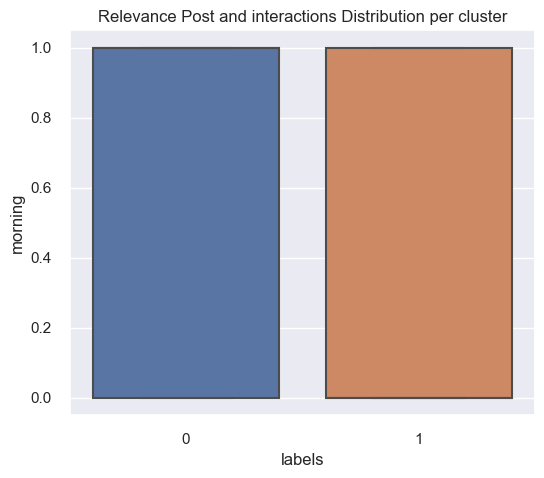

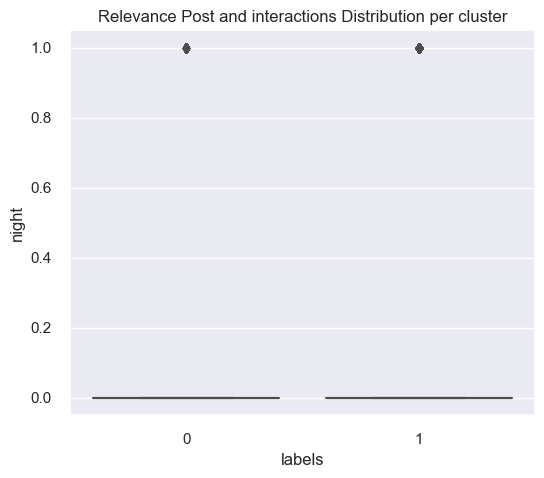

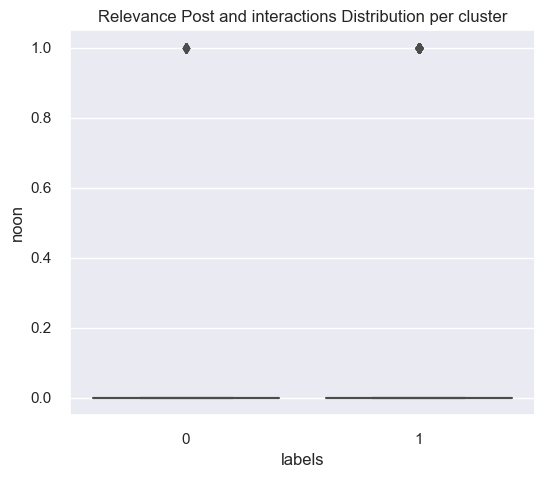

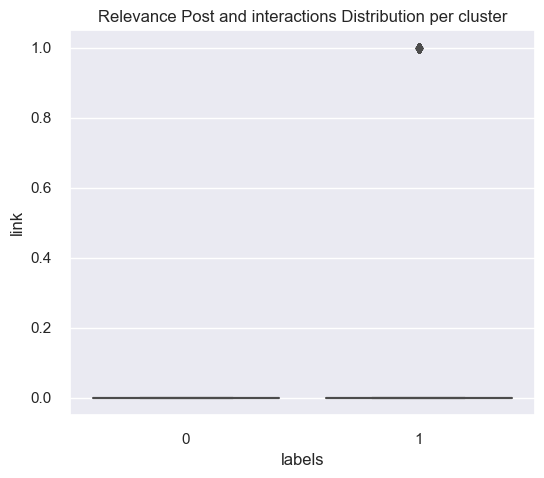

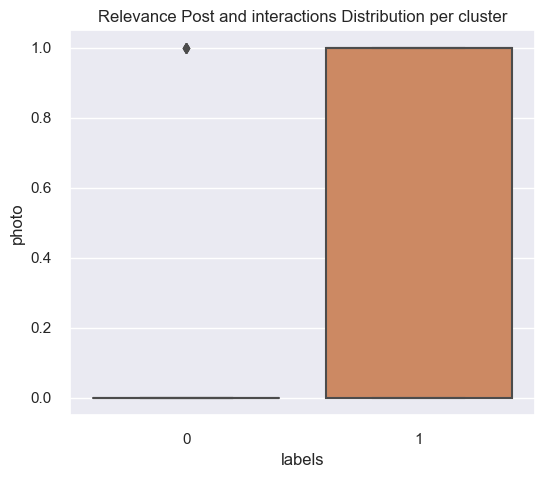

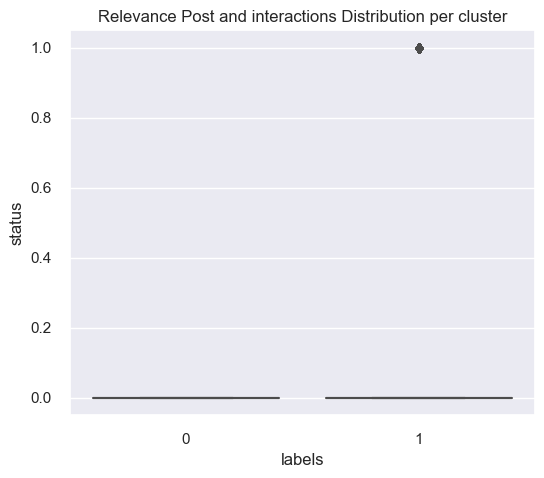

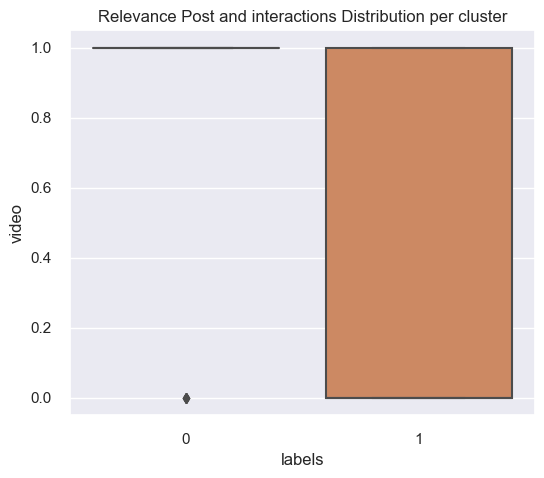

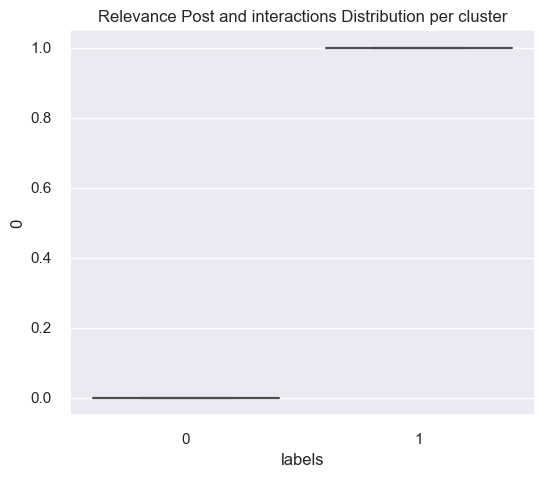

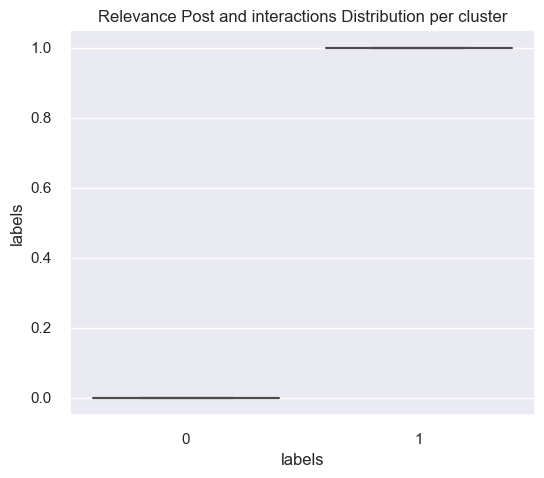

In [91]:
columns = X_Hierarchy.columns
for i in columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(6, 5)})
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(x='labels', y=i, data=X_Hierarchy)
    plt.title("Relevance Post and interactions Distribution per cluster".format(i))

Finalmente, se producen gráficos de caja para cada variable de interés (número de reacciones y comentarios) que muestran la distribución de los datos en cada cluster. Estos gráficos permiten visualizar la relación entre las publicaciones y las reacciones y comentarios que tienen, lo que es útil para entender cómo se están agrupando las publicaciones en función de su popularidad y interacción con los usuarios.

## 5.3 Ejercicio 3: Rendimiento del clustering mediante silueta

* **Ejercicio N°3**: Calcula el rendimiento del clustering mediante un parámetro como puede ser silueta..

In [93]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit(X_pca)

# Calculate silhouette score
ss_all = []
for n in range(2, 11):
    ac = (AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage='ward'))
    predict = ac.fit_predict(X_pca)
    score = silhouette_score(X = X_pca, labels = predict)
    ss_all.append(score)

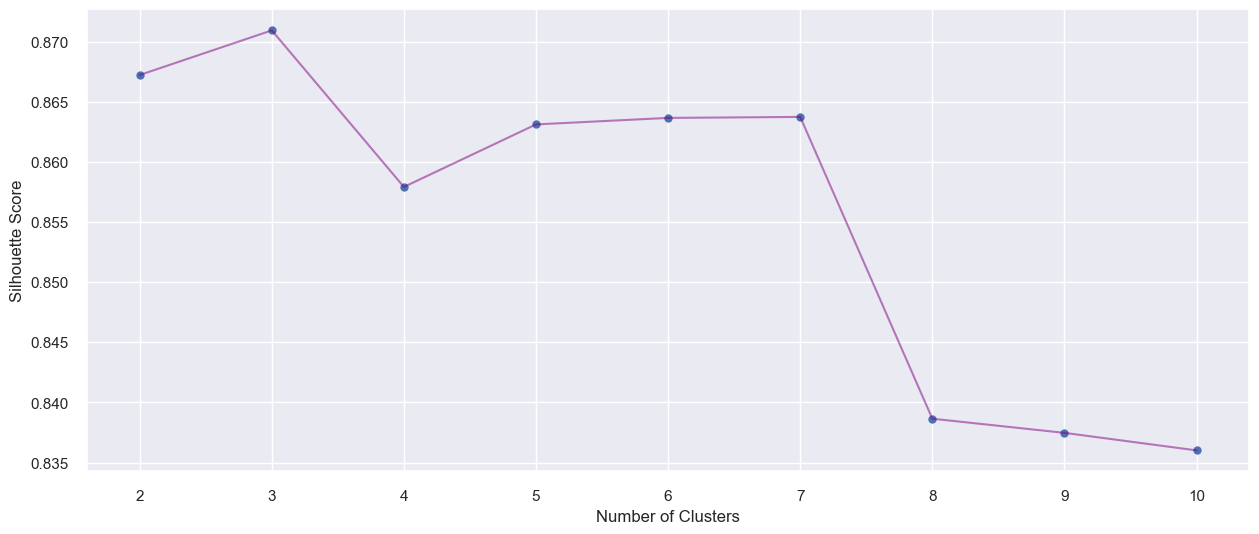

In [94]:
## Plot the number of clusters vs the silhouette score for the dataset.
##from https://statisticallyrelevant.com/k-means-clustering-in-python/
plt.figure(figsize = (15 ,6))
plt.plot(np.arange(2 , 11) , ss_all , 'o')
#plt.plot(np.arange(2 , 11) , ss_all , 'o', label = "Combined") ##plot with label
plt.plot(np.arange(2 , 11) , ss_all , '-' , alpha = 0.5, color = 'purple')
#plt.legend()
plt.xlabel('Number of Clusters') , plt.ylabel('Silhouette Score')
plt.show()

El resultado de este modelo de clusterización jerárquica utilizando el algoritmo AgglomerativeClustering muestra que la variable principal utilizada para la separación de los registros en diferentes grupos fue el número de reacciones. En un grafico se puede ver la relación entre el número de clústeres y el score de Silhouette, que indica la cohesión y separación de los grupos.

Se puede observar que el score más alto se obtiene cuando se separan los datos en dos clústeres, lo cual es coherente con la variable utilizada como principal. El gráfico también muestra que a medida que se aumenta el número de clústeres, el score de Silhouette disminuye, lo cual sugiere que los clústeres se vuelven más difusos y menos distintos entre sí.

En conclusión, este modelo y gráfico muestran la efectividad de la clusterización jerárquica para separar los registros en grupos distintos en función del número de reacciones.

# 6. Conclusiones:

El análisis de clustering parece haber arrojado un resultado interesante, sugiriendo la posibilidad de dividir los registros en dos o tres grupos distintos. Si se busca un enfoque en las publicaciones, con una mayor consideración hacia el número de reacciones, la clusterización jerárquica parece ser la más adecuada, logrando un resultado de Silhouette sobresaliente de 0,885.

Por otro lado, si se desea poner un énfasis en los comentarios, el modelo K-means se muestra como una buena opción, obteniendo un resultado de Score de Silhouette de 0.757 cuando se divide la clusterización en tres grupos.

En conclusión, ambos modelos han demostrado resultados positivos, por lo que la elección dependerá del enfoque y objetivo específico que se quiera lograr con el análisis.